# Reproducibility Experiment Analysis

necessary imports

In [2]:
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras import losses
from numpy import mean, std

from results.e_9_CPU_single_025_2110837058.settings import repetitions as cpu_repetitions
from results.e_9_CPU_single_025_2110837058.settings import repetitions as cpu_single_repetitions
from results.e_9_CPU_multi_025_2110837058.settings import repetitions as cpu_multi_repetitions
from results.e_9_GPU_025_2110837058.settings import repetitions as gpu_repetitions
from results.e_9_GPU_025_2110837058.settings import epochs as gpu_epochs 
from results.e_13_GPU_025_2110837058.settings import repetitions as e13_gpu_repetitions
from results.e_13_GPU_025_2110837058.settings import epochs as e13_gpu_epochs 
from results.e_23_GPU_025_2110837058.settings import repetitions as e23_gpu_repetitions
from results.e_23_GPU_025_2110837058.settings import epochs as e23_gpu_epochs 
from results.e_273_GPU_025_2110837058.settings import repetitions as e273_gpu_repetitions
from results.e_273_GPU_025_2110837058.settings import epochs as e273_gpu_epochs
from results.e_11_GPU_025_2110837058_smallest_layer_4.settings import repetitions as e11_gpu_repetitions
from results.e_11_GPU_025_2110837058_smallest_layer_4.settings import epochs as e11_gpu_epochs

## 9 layer autoencoder
### CPU

In [4]:
### Checking single-thread CPU processing results
# Loading the loss histories and validation loss histories
cpu_single_loss_histories = read_csv('results/e_9_CPU_single_025_2110837058/loss_histories.csv', index_col= 0)
cpu_single_val_loss_hists = read_csv('results/e_9_CPU_single_025_2110837058/val_loss_hists.csv', index_col= 0)

# checking, how many results were produced
print('{} repetitions of the single-thread CPU experiment produced {} distinct loss histories.'.format(cpu_single_repetitions, cpu_single_loss_histories.shape[1]))
print('{} repetitions of the single-thread CPU experiment produced {} distinct validation loss histories.'.format(cpu_single_repetitions, cpu_single_val_loss_hists.shape[1]))

100 repetitions of the single-thread CPU experiment produced 1 distinct loss histories.
100 repetitions of the single-thread CPU experiment produced 1 distinct validation loss histories.


In [5]:
### Checking single-thread CPU processing results
# Loading the loss histories and validation loss histories
cpu_multi_loss_histories = read_csv('results/e_9_CPU_multi_025_2110837058/loss_histories.csv', index_col= 0)
cpu_multi_val_loss_hists = read_csv('results/e_9_CPU_multi_025_2110837058/val_loss_hists.csv', index_col= 0)
# checking, how many results were produced
print('{} repetitions of the multi-thread CPU experiment produced {} distinct loss histories.'.format(cpu_multi_repetitions, cpu_multi_loss_histories.shape[1]))
print('{} repetitions of the multi-thread CPU experiment produced {} distinct validation loss histories.'.format(cpu_multi_repetitions, cpu_multi_val_loss_hists.shape[1]))

if (cpu_multi_loss_histories == cpu_single_loss_histories).all:
    print('The loss histories are identical.')
else:
    print('The loss histories are NOT identical.')

if (cpu_multi_val_loss_hists == cpu_single_val_loss_hists).all:
    print('The validation loss histories are identical.')
else:
    print('The validation loss histories are NOT identical.')


100 repetitions of the multi-thread CPU experiment produced 1 distinct loss histories.
100 repetitions of the multi-thread CPU experiment produced 1 distinct validation loss histories.
The loss histories are identical.
The validation loss histories are identical.


In [6]:
final_cpu_loss = cpu_single_loss_histories.T[4].values[0]
final_cpu_val_loss = cpu_single_val_loss_hists.T[4].values[0]

### GPU

In [7]:
# Loading the loss histories and validation loss histories
gpu_loss_histories = read_csv('results/e_9_GPU_025_2110837058/loss_histories.csv', index_col= 0)
gpu_val_loss_hists = read_csv('results/e_9_GPU_025_2110837058/val_loss_hists.csv', index_col= 0)

gpu_lhs_set = set(gpu_loss_histories.columns)
gpu_vlh_set = set(gpu_val_loss_hists.columns)
lh_diff_same_vl = list(gpu_lhs_set - gpu_vlh_set)
vl_diff_same_lh = list(gpu_vlh_set - gpu_lhs_set)
num_variations = len(list(gpu_lhs_set.union(gpu_vlh_set)))

# checking, how many results were produced
print('{} repetitions of the GPU experiment produced {} distinct loss histories.'.format(gpu_repetitions, gpu_loss_histories.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct validation loss histories.'.format(gpu_repetitions, gpu_val_loss_hists.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct model performances.'.format(gpu_repetitions, num_variations))
print(' ')
print('{} repetitions have the same loss histories but different validation loss histories.'.format(len(vl_diff_same_lh)))
print('{} repetitions have the same validation loss histories but different loss histories.'.format(len(lh_diff_same_vl)))

100 repetitions of the GPU experiment produced 55 distinct loss histories.
100 repetitions of the GPU experiment produced 94 distinct validation loss histories.
100 repetitions of the GPU experiment produced 99 distinct model performances.
 
44 repetitions have the same loss histories but different validation loss histories.
5 repetitions have the same validation loss histories but different loss histories.


#### GPU Loss Histories
##### Training Loss


In [8]:
highest_final_loss_index = gpu_loss_histories.T[4].idxmax()
lowest_final_loss_index = gpu_loss_histories.T[4].idxmin()

extreme_losses = gpu_loss_histories[[highest_final_loss_index, lowest_final_loss_index]]

print('After the {} epoch, repetition {} had the highest loss. '.format(gpu_epochs, highest_final_loss_index) )
print('After the {} epoch, repetition {} had the lowest loss. '.format(gpu_epochs, lowest_final_loss_index))
print(' ')

print('The difference between them was {}.'.format(extreme_losses.T[4][0] - extreme_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(gpu_loss_histories.T[4])))

After the 5 epoch, repetition 6 had the highest loss. 
After the 5 epoch, repetition 49 had the lowest loss. 
 
The difference between them was 6.5192579997569444e-09.
 
The standard deviation of losses in the last epoch was 1.4784772359696222e-09.


##### Validation Loss

In [9]:
highest_final_val_loss_index = gpu_val_loss_hists.T[4].idxmax()
lowest_final_val_loss_index = gpu_val_loss_hists.T[4].idxmin()

extreme_val_losses = gpu_val_loss_hists[[highest_final_val_loss_index, lowest_final_val_loss_index]]

print('After the {} epoch, repetition {} had the highest validation loss. '.format(gpu_epochs, highest_final_val_loss_index) )
print('After the {} epoch, repetition {} had the lowest validation loss. '.format(gpu_epochs, lowest_final_val_loss_index))
print(' ')
print('The difference between them was {}.'.format(extreme_val_losses.T[4][0] - extreme_val_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(gpu_val_loss_hists.T[4])))

After the 5 epoch, repetition 90 had the highest validation loss. 
After the 5 epoch, repetition 81 had the lowest validation loss. 
 
The difference between them was 1.2759119270150387e-07.
 
The standard deviation of losses in the last epoch was 2.6956826239793233e-08.


In [10]:
final_gpu_losses = gpu_loss_histories.T[4]
final_gpu_val_losses = gpu_val_loss_hists.T[4]

print('Were any final GPU losses identical to the final CPU loss? {}'.format(final_gpu_losses.any == final_cpu_loss))
print('Were any final GPU validation losses identical to the final CPU validation loss? {}'.format(final_gpu_val_losses.any == final_cpu_val_loss))
print(' ')
print('The smallest difference between the final CPU loss and a GPU loss is {}'.format((gpu_loss_histories.T[4] - final_cpu_loss).min()))
print('The smallest difference between the final CPU validation loss and a GPU validation loss is {}'.format((gpu_val_loss_hists.T[4] - final_cpu_val_loss).min()))
print(' ')
print('The mean difference betweeen the final CPU loss and GPU losses is {}'.format((gpu_loss_histories.T[4] - final_cpu_loss).mean()))
print('The mean difference betweeen the final CPU validation loss and GPU validation losses is {}'.format((gpu_val_loss_hists.T[4] - final_cpu_val_loss).mean()))

Were any final GPU losses identical to the final CPU loss? False
Were any final GPU validation losses identical to the final CPU validation loss? False
 
The smallest difference between the final CPU loss and a GPU loss is 1.9804574548998657e-06
The smallest difference between the final CPU validation loss and a GPU validation loss is 1.536402851339859e-05
 
The mean difference betweeen the final CPU loss and GPU losses is 1.9852749326179673e-06
The mean difference betweeen the final CPU validation loss and GPU validation losses is 1.545381197266339e-05


##### Loss Graphs

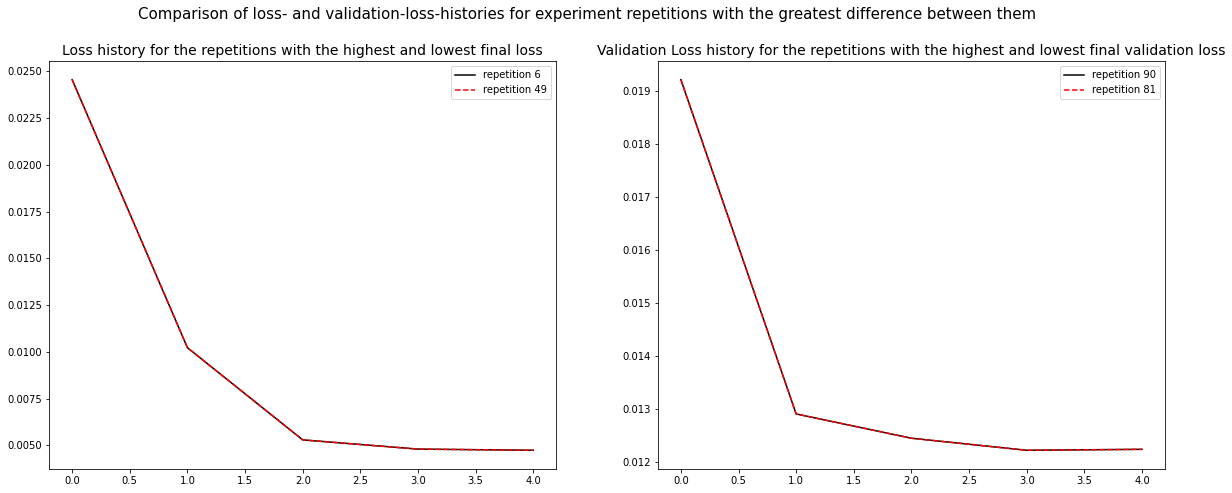

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(extreme_losses[highest_final_loss_index],'k-' )
ax1.plot(extreme_losses[lowest_final_loss_index], 'r--')
ax1.set_title("Loss history for the repetitions with the highest and lowest final loss", fontsize = 14)
ax1.legend(['repetition {}'.format(highest_final_loss_index), 'repetition {}'.format(lowest_final_loss_index)])
ax2.plot(extreme_val_losses[highest_final_val_loss_index], 'k-' )
ax2.plot(extreme_val_losses[lowest_final_val_loss_index], 'r--')
ax2.set_title("Validation Loss history for the repetitions with the highest and lowest final validation loss", fontsize = 14)
ax2.legend(['repetition {}'.format(highest_final_val_loss_index), 'repetition {}'.format(lowest_final_val_loss_index)])

fig.suptitle('Comparison of loss- and validation-loss-histories for experiment repetitions with the greatest difference between them ', fontsize = 15)

fig.savefig("./graphs/histories.png", format="png", dpi = 500, bbox_inches='tight')

#### GPU Decoder Outputs

The differences are miniscule. An investigation into the effect on the model outputs is, however, still warranted.

In [12]:
lowest_val_loss_decoder = read_csv('results/e_9_GPU_025_2110837058/decoder_output_{}'.format(highest_final_val_loss_index), index_col= 0)
highest_val_loss_decoder = read_csv('results/e_9_GPU_025_2110837058/decoder_output_{}'.format(lowest_final_val_loss_index), index_col= 0)

sum_absolute_differences = abs(highest_val_loss_decoder - lowest_val_loss_decoder)
greatest_difference_index = DataFrame(sum_absolute_differences.T.sum()).idxmax()[0]

decoded_1 = lowest_val_loss_decoder.T[greatest_difference_index]
decoded_2 = highest_val_loss_decoder.T[greatest_difference_index]

gddi = DataFrame(abs(decoded_2 - decoded_1)).idxmax().values[0]
zoomrange = [str(int(gddi) - 1), str(int(gddi) + 1)]

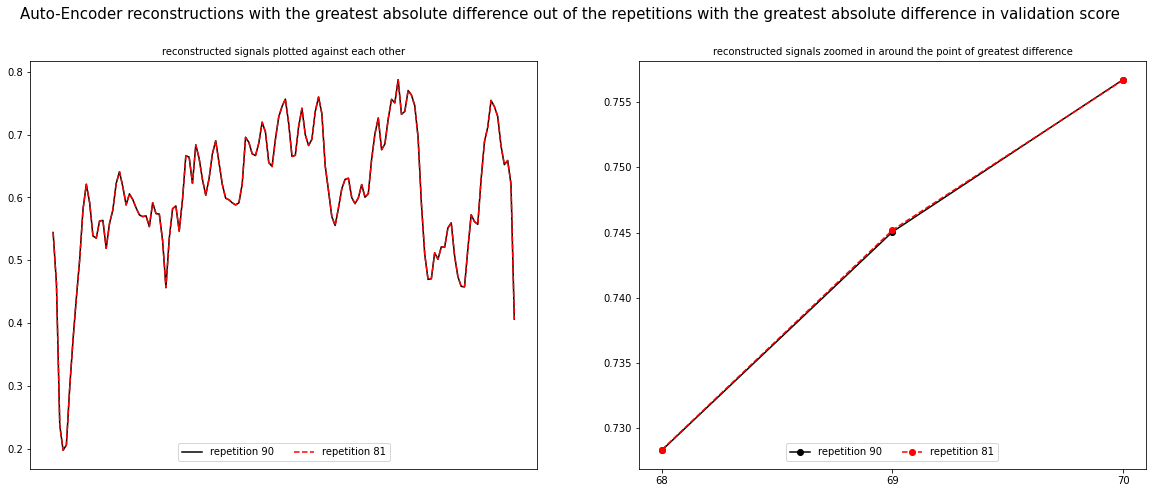

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(decoded_1, 'k-' )
ax1.plot(decoded_2, 'r--')
ax1.set_title('reconstructed signals plotted against each other', fontsize = 10)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.legend(['repetition {}'.format(highest_final_val_loss_index), 'repetition {}'.format(lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)


ax2.plot(decoded_1[zoomrange[0]: zoomrange[1]], 'ko-' )
ax2.plot(decoded_2[zoomrange[0]: zoomrange[1]], 'ro--')
ax2.set_title('reconstructed signals zoomed in around the point of greatest difference', fontsize = 10)
ax2.legend(['repetition {}'.format(highest_final_val_loss_index), 'repetition {}'.format(lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)

fig.suptitle('Auto-Encoder reconstructions with the greatest absolute difference out of the repetitions with the greatest absolute difference in validation score', fontsize = 15)
fig.savefig("./graphs/reconstruction.png", format="png", dpi = 500, bbox_inches='tight')

In [14]:
sum_abs_diff = DataFrame(abs(decoded_2 - decoded_1)).sum().values[0]
mean_diff = DataFrame(abs(decoded_2 - decoded_1)).mean().values[0]
greatest_difference = DataFrame(abs(decoded_2 - decoded_1)).max().values[0]

minimum_value = min(decoded_1.min(), decoded_2.min())
value_of_greatest_diff = min(decoded_1[greatest_difference_index], decoded_2[greatest_difference_index])

mean_percentage = (mean_diff/minimum_value)*100
max_percentage = (greatest_difference/minimum_value)*100
actual_value_percentage = (greatest_difference/value_of_greatest_diff)*100

print('The sum of absolute differences is {}.'.format(sum_abs_diff))
print('The mean difference is {}.'.format(mean_diff))
print('The average difference is {:.4%} of the lowest value.'.format(mean_percentage))
print('The greatest difference is {}.'.format(greatest_difference))
print('The greatest difference is {:.4%} of the lowest value.'.format(max_percentage))
print('The greatest difference is {:.4%} of the lower value.'.format(actual_value_percentage))

The sum of absolute differences is 0.005366360000000875.
The mean difference is 3.833114285714911e-05.
The average difference is 1.9427% of the lowest value.
The greatest difference is 0.00013456000000000579.
The greatest difference is 6.8199% of the lowest value.
The greatest difference is 2.2802% of the lower value.


In [15]:
normal_test_data = read_csv('results/025_2110837058/normal_test_data.csv', index_col= 0)

model_1 = load_model('results/e_9_GPU_025_2110837058/model_5_125_{}'.format(highest_final_val_loss_index))
model_2 = load_model('results/e_9_GPU_025_2110837058/model_5_125_{}'.format(lowest_final_val_loss_index))

reconstructions_1 = model_1.predict(normal_test_data)
reconstructions_2 = model_2.predict(normal_test_data)

train_loss_1 = losses.mae(reconstructions_1, normal_test_data)
train_loss_2 = losses.mae(reconstructions_2, normal_test_data)


threshold_1 = mean(train_loss_1) + 2*std(train_loss_1)
threshold_2 = mean(train_loss_2) + 2*std(train_loss_2)

print('The difference in mean absolute errors between the models is {}.'.format(abs(mean(train_loss_1) - mean(train_loss_2))))
print('The difference between thresholds for classification as an anomaly is {}.'.format(abs(threshold_1 - threshold_2)))

The difference in mean absolute errors between the models is 1.8531040419517142e-07.
The difference between thresholds for classification as an anomaly is 2.2345868852524653e-07.


## 13 layer autoencoder
### GPU


In [16]:
# Loading the loss histories and validation loss histories
e13_gpu_loss_histories = read_csv('results/e_13_GPU_025_2110837058/loss_histories.csv', index_col= 0)
e13_gpu_val_loss_hists = read_csv('results/e_13_GPU_025_2110837058/val_loss_hists.csv', index_col= 0)

e13_gpu_lhs_set = set(e13_gpu_loss_histories.columns)
e13_gpu_vlh_set = set(e13_gpu_val_loss_hists.columns)
e13_lh_diff_same_vl = list(e13_gpu_lhs_set - e13_gpu_vlh_set)
e13_vl_diff_same_lh = list(e13_gpu_vlh_set - e13_gpu_lhs_set)
e13_num_variations = len(list(e13_gpu_lhs_set.union(e13_gpu_vlh_set)))

# checking, how many results were produced
print('{} repetitions of the GPU experiment produced {} distinct loss histories.'.format(e13_gpu_repetitions, e13_gpu_loss_histories.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct validation loss histories.'.format(e13_gpu_repetitions, e13_gpu_val_loss_hists.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct model performances.'.format(e13_gpu_repetitions, e13_num_variations))
print(' ')
print('{} repetitions have the same loss histories but different validation loss histories.'.format(len(e13_vl_diff_same_lh)))
print('{} repetitions have the same validation loss histories but different loss histories.'.format(len(e13_lh_diff_same_vl)))

100 repetitions of the GPU experiment produced 101 distinct loss histories.
100 repetitions of the GPU experiment produced 101 distinct validation loss histories.
100 repetitions of the GPU experiment produced 101 distinct model performances.
 
0 repetitions have the same loss histories but different validation loss histories.
0 repetitions have the same validation loss histories but different loss histories.


### GPU Loss Histories
#### Loss

In [17]:
e13_highest_final_loss_index = e13_gpu_loss_histories.T[4].idxmax()
e13_lowest_final_loss_index = e13_gpu_loss_histories.T[4].idxmin()

e13_extreme_losses = e13_gpu_loss_histories[[e13_highest_final_loss_index, e13_lowest_final_loss_index]]

print('After the {} epoch, repetition {} had the highest loss. '.format(e13_gpu_epochs, e13_highest_final_loss_index) )
print('After the {} epoch, repetition {} had the lowest loss. '.format(e13_gpu_epochs, e13_lowest_final_loss_index))
print(' ')

print('The difference between them was {}.'.format(e13_extreme_losses.T[4][0] - e13_extreme_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e13_gpu_loss_histories.T[4])))

After the 5 epoch, repetition 19 had the highest loss. 
After the 5 epoch, repetition 28 had the lowest loss. 
 
The difference between them was 2.1606683730038267e-07.
 
The standard deviation of losses in the last epoch was 7.375148668965453e-08.


#### Validation Loss

In [18]:
e13_highest_final_val_loss_index = e13_gpu_val_loss_hists.T[4].idxmax()
e13_lowest_final_val_loss_index = e13_gpu_val_loss_hists.T[4].idxmin()

e13_extreme_val_losses = e13_gpu_val_loss_hists[[e13_highest_final_val_loss_index, e13_lowest_final_val_loss_index]]

print('After the {} epoch, repetition {} had the highest validation loss. '.format(e13_gpu_epochs, e13_highest_final_val_loss_index) )
print('After the {} epoch, repetition {} had the lowest validation loss. '.format(e13_gpu_epochs, e13_lowest_final_val_loss_index))
print(' ')
print('The difference between them was {}.'.format(e13_extreme_val_losses.T[4][0] - e13_extreme_val_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e13_gpu_val_loss_hists.T[4])))

After the 5 epoch, repetition 13 had the highest validation loss. 
After the 5 epoch, repetition 58 had the lowest validation loss. 
 
The difference between them was 1.1027790606099944e-05.
 
The standard deviation of losses in the last epoch was 2.312654302888243e-06.


In [19]:
e13_final_gpu_losses = e13_gpu_loss_histories.T[4]
e13_final_gpu_val_losses = e13_gpu_val_loss_hists.T[4]

print('Were any final GPU losses identical to the final CPU loss? {}'.format(e13_final_gpu_losses.any == final_cpu_loss))
print('Were any final GPU validation losses identical to the final CPU validation loss? {}'.format(e13_final_gpu_val_losses.any == final_cpu_val_loss))
print(' ')
print('The smallest difference between the final CPU loss and a GPU loss is {}'.format((e13_gpu_loss_histories.T[4] - final_cpu_loss).min()))
print('The smallest difference between the final CPU validation loss and a GPU validation loss is {}'.format((e13_gpu_val_loss_hists.T[4] - final_cpu_val_loss).min()))
print(' ')
print('The mean difference betweeen the final CPU loss and GPU losses is {}'.format((e13_gpu_loss_histories.T[4] - final_cpu_loss).mean()))
print('The mean difference betweeen the final CPU validation loss and GPU validation losses is {}'.format((e13_gpu_val_loss_hists.T[4] - final_cpu_val_loss).mean()))

Were any final GPU losses identical to the final CPU loss? False
Were any final GPU validation losses identical to the final CPU validation loss? False
 
The smallest difference between the final CPU loss and a GPU loss is -1.1735595762700154e-05
The smallest difference between the final CPU validation loss and a GPU validation loss is 4.8587098716995625e-06
 
The mean difference betweeen the final CPU loss and GPU losses is -1.1677517196038606e-05
The mean difference betweeen the final CPU validation loss and GPU validation losses is 7.82110866634494e-06


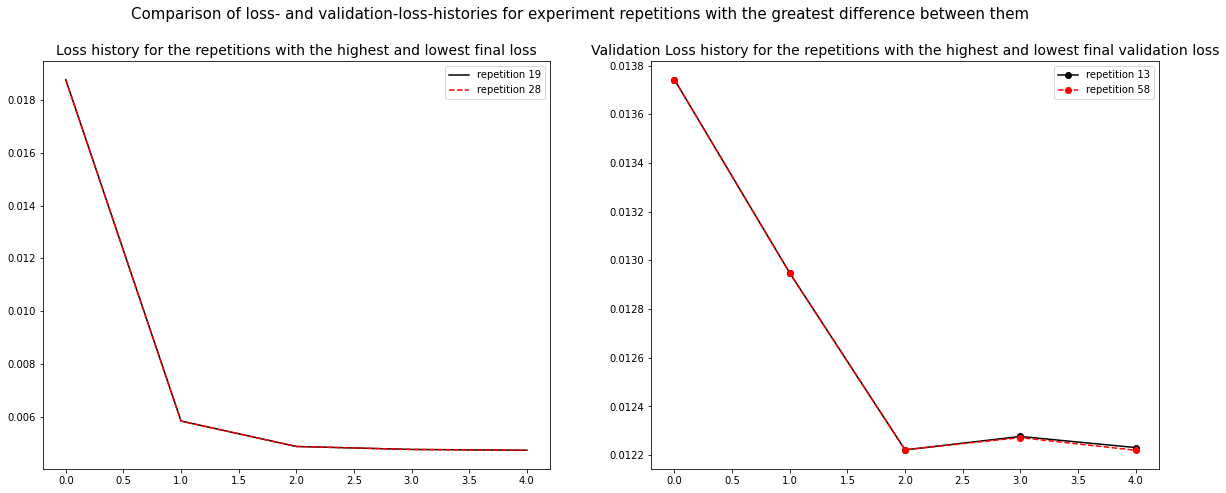

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e13_extreme_losses[e13_highest_final_loss_index],'k-' )
ax1.plot(e13_extreme_losses[e13_lowest_final_loss_index], 'r--')
ax1.set_title("Loss history for the repetitions with the highest and lowest final loss", fontsize = 14)
ax1.legend(['repetition {}'.format(e13_highest_final_loss_index), 'repetition {}'.format(e13_lowest_final_loss_index)])
ax2.plot(e13_extreme_val_losses[e13_highest_final_val_loss_index], 'ko-' )
ax2.plot(e13_extreme_val_losses[e13_lowest_final_val_loss_index], 'ro--')
ax2.set_title("Validation Loss history for the repetitions with the highest and lowest final validation loss", fontsize = 14)
ax2.legend(['repetition {}'.format(e13_highest_final_val_loss_index), 'repetition {}'.format(e13_lowest_final_val_loss_index)])

fig.suptitle('Comparison of loss- and validation-loss-histories for experiment repetitions with the greatest difference between them ', fontsize = 15)

fig.savefig("./graphs/e13_histories.png", format="png", dpi = 500, bbox_inches='tight')

#### GPU Decoder Outputs

In [21]:
e13_lowest_val_loss_decoder = read_csv('results/e_13_GPU_025_2110837058/decoder_output_{}'.format(e13_highest_final_val_loss_index), index_col= 0)
e13_highest_val_loss_decoder = read_csv('results/e_13_GPU_025_2110837058/decoder_output_{}'.format(e13_lowest_final_val_loss_index), index_col= 0)

e13_sum_absolute_differences = abs(e13_highest_val_loss_decoder - e13_lowest_val_loss_decoder)
e13_greatest_difference_index = DataFrame(e13_sum_absolute_differences.T.sum()).idxmax()[0]

e13_decoded_1 = e13_lowest_val_loss_decoder.T[e13_greatest_difference_index]
e13_decoded_2 = e13_highest_val_loss_decoder.T[e13_greatest_difference_index]

e13_gddi = DataFrame(abs(e13_decoded_2 - e13_decoded_1)).idxmax().values[0]
e13_zoomrange = [str(int(e13_gddi) - 1), str(int(e13_gddi) + 1)]

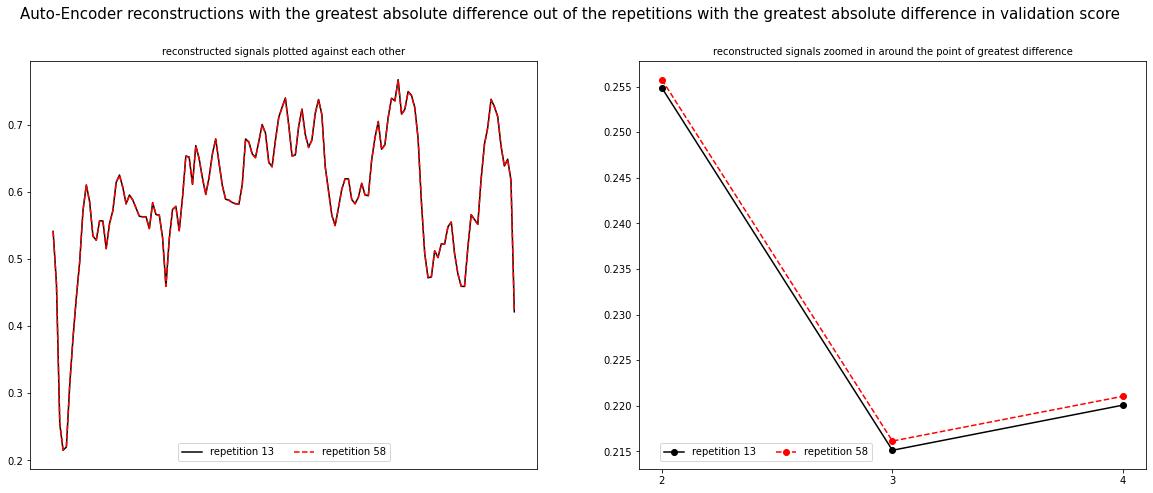

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e13_decoded_1, 'k-' )
ax1.plot(e13_decoded_2, 'r--')
ax1.set_title('reconstructed signals plotted against each other', fontsize = 10)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.legend(['repetition {}'.format(e13_highest_final_val_loss_index), 'repetition {}'.format(e13_lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)


ax2.plot(e13_decoded_1[e13_zoomrange[0]: e13_zoomrange[1]], 'ko-' )
ax2.plot(e13_decoded_2[e13_zoomrange[0]: e13_zoomrange[1]], 'ro--')
ax2.set_title('reconstructed signals zoomed in around the point of greatest difference', fontsize = 10)
ax2.legend(['repetition {}'.format(e13_highest_final_val_loss_index), 'repetition {}'.format(e13_lowest_final_val_loss_index)], bbox_to_anchor=(0.25, .075), loc='upper center', ncol = 2)

fig.suptitle('Auto-Encoder reconstructions with the greatest absolute difference out of the repetitions with the greatest absolute difference in validation score', fontsize = 15)
fig.savefig("./graphs/e13_reconstruction.png", format="png", dpi = 500, bbox_inches='tight')

In [23]:
e13_sum_abs_diff = DataFrame(abs(e13_decoded_2 - e13_decoded_1)).sum().values[0]
e13_mean_diff = DataFrame(abs(e13_decoded_2 - e13_decoded_1)).mean().values[0]
e13_greatest_difference = DataFrame(abs(e13_decoded_2 - e13_decoded_1)).max().values[0]
e13_greatest_diff_index = DataFrame(abs(e13_decoded_2 - e13_decoded_1)).idxmax().values[0]

e13_minimum_value = min(e13_decoded_1.min(), e13_decoded_2.min())
e13_value_of_greatest_diff = min(e13_decoded_1[e13_greatest_diff_index], e13_decoded_2[e13_greatest_diff_index])

e13_mean_percentage = (e13_mean_diff/e13_minimum_value)*100
e13_max_percentage = (e13_greatest_difference/e13_minimum_value)*100
e13_actual_value_percentage = (e13_greatest_difference/e13_value_of_greatest_diff)*100

print('The sum of absolute differences is {}.'.format(e13_sum_abs_diff))
print('The mean difference is {}.'.format(e13_mean_diff))
print('The average difference is {:.4%} of the lowest value.'.format(e13_mean_percentage))
print('The greatest difference is {}.'.format(e13_greatest_difference))
print('The greatest difference is {:.4%} of the lowest value.'.format(e13_max_percentage))
print('The greatest difference is {:.4%} of the lower value.'.format(e13_actual_value_percentage))

The sum of absolute differences is 0.06788810999999986.
The mean difference is 0.00048491507142857046.
The average difference is 22.5405% of the lowest value.
The greatest difference is 0.0010089200000000242.
The greatest difference is 46.8979% of the lowest value.
The greatest difference is 46.8979% of the lower value.


## 23 layer autoencoder


In [24]:
# Loading the loss histories and validation loss histories
e23_gpu_loss_histories = read_csv('results/e_23_GPU_025_2110837058/loss_histories.csv', index_col= 0)
e23_gpu_val_loss_hists = read_csv('results/e_23_GPU_025_2110837058/val_loss_hists.csv', index_col= 0)

e23_gpu_lhs_set = set(e23_gpu_loss_histories.columns)
e23_gpu_vlh_set = set(e23_gpu_val_loss_hists.columns)
e23_lh_diff_same_vl = list(e23_gpu_lhs_set - e23_gpu_vlh_set)
e23_vl_diff_same_lh = list(e23_gpu_vlh_set - e23_gpu_lhs_set)
e23_num_variations = len(list(e23_gpu_lhs_set.union(e23_gpu_vlh_set)))

# checking, how many results were produced
print('{} repetitions of the GPU experiment produced {} distinct loss histories.'.format(e23_gpu_repetitions, e23_gpu_loss_histories.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct validation loss histories.'.format(e23_gpu_repetitions, e23_gpu_val_loss_hists.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct model performances.'.format(e23_gpu_repetitions, e23_num_variations))
print(' ')
print('{} repetitions have the same loss histories but different validation loss histories.'.format(len(e23_vl_diff_same_lh)))
print('{} repetitions have the same validation loss histories but different loss histories.'.format(len(e23_lh_diff_same_vl)))

100 repetitions of the GPU experiment produced 101 distinct loss histories.
100 repetitions of the GPU experiment produced 101 distinct validation loss histories.
100 repetitions of the GPU experiment produced 101 distinct model performances.
 
0 repetitions have the same loss histories but different validation loss histories.
0 repetitions have the same validation loss histories but different loss histories.


### GPU Loss Histories
#### Training Loss

In [25]:
e23_highest_final_loss_index = e23_gpu_loss_histories.T[4].idxmax()
e23_lowest_final_loss_index = e23_gpu_loss_histories.T[4].idxmin()

e23_extreme_losses = e23_gpu_loss_histories[[e23_highest_final_loss_index, e23_lowest_final_loss_index]]

print('After the {} epoch, repetition {} had the highest loss. '.format(e23_gpu_epochs, e23_highest_final_loss_index) )
print('After the {} epoch, repetition {} had the lowest loss. '.format(e23_gpu_epochs, e23_lowest_final_loss_index))
print(' ')

print('The difference between them was {}.'.format(e23_extreme_losses.T[4][0] - e23_extreme_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e23_gpu_loss_histories.T[4])))


After the 5 epoch, repetition 9 had the highest loss. 
After the 5 epoch, repetition 12 had the lowest loss. 
 
The difference between them was 2.288259565799873e-06.
 
The standard deviation of losses in the last epoch was 5.171043162922912e-07.


#### Validation Loss

In [26]:
e23_highest_final_val_loss_index = e23_gpu_val_loss_hists.T[4].idxmax()
e23_lowest_final_val_loss_index = e23_gpu_val_loss_hists.T[4].idxmin()

e23_extreme_val_losses = e23_gpu_val_loss_hists[[e23_highest_final_val_loss_index, e23_lowest_final_val_loss_index]]

print('After the {} epoch, repetition {} had the highest validation loss. '.format(e23_gpu_epochs, e23_highest_final_val_loss_index) )
print('After the {} epoch, repetition {} had the lowest validation loss. '.format(e23_gpu_epochs, e23_lowest_final_val_loss_index))
print(' ')
print('The difference between them was {}.'.format(e23_extreme_val_losses.T[4][0] - e23_extreme_val_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e23_gpu_val_loss_hists.T[4])))


After the 5 epoch, repetition 9 had the highest validation loss. 
After the 5 epoch, repetition 12 had the lowest validation loss. 
 
The difference between them was 1.9128434359999558e-05.
 
The standard deviation of losses in the last epoch was 5.286631819522996e-06.


In [27]:
e23_final_gpu_losses = e23_gpu_loss_histories.T[4]
e23_final_gpu_val_losses = e23_gpu_val_loss_hists.T[4]

print('Were any final GPU losses identical to the final CPU loss? {}'.format(e23_final_gpu_losses.any == final_cpu_loss))
print('Were any final GPU validation losses identical to the final CPU validation loss? {}'.format(e23_final_gpu_val_losses.any == final_cpu_val_loss))
print(' ')
print('The smallest difference between the final CPU loss and a GPU loss is {}'.format((e23_gpu_loss_histories.T[4] - final_cpu_loss).min()))
print('The smallest difference between the final CPU validation loss and a GPU validation loss is {}'.format((e23_gpu_val_loss_hists.T[4] - final_cpu_val_loss).min()))
print(' ')
print('The mean difference betweeen the final CPU loss and GPU losses is {}'.format((e23_gpu_loss_histories.T[4] - final_cpu_loss).mean()))
print('The mean difference betweeen the final CPU validation loss and GPU validation losses is {}'.format((e23_gpu_val_loss_hists.T[4] - final_cpu_val_loss).mean()))


Were any final GPU losses identical to the final CPU loss? False
Were any final GPU validation losses identical to the final CPU validation loss? False
 
The smallest difference between the final CPU loss and a GPU loss is 4.642596468330037e-05
The smallest difference between the final CPU validation loss and a GPU validation loss is 0.00017597246915099923
 
The mean difference betweeen the final CPU loss and GPU losses is 4.804039853486436e-05
The mean difference betweeen the final CPU validation loss and GPU validation losses is 0.00018864113948128652


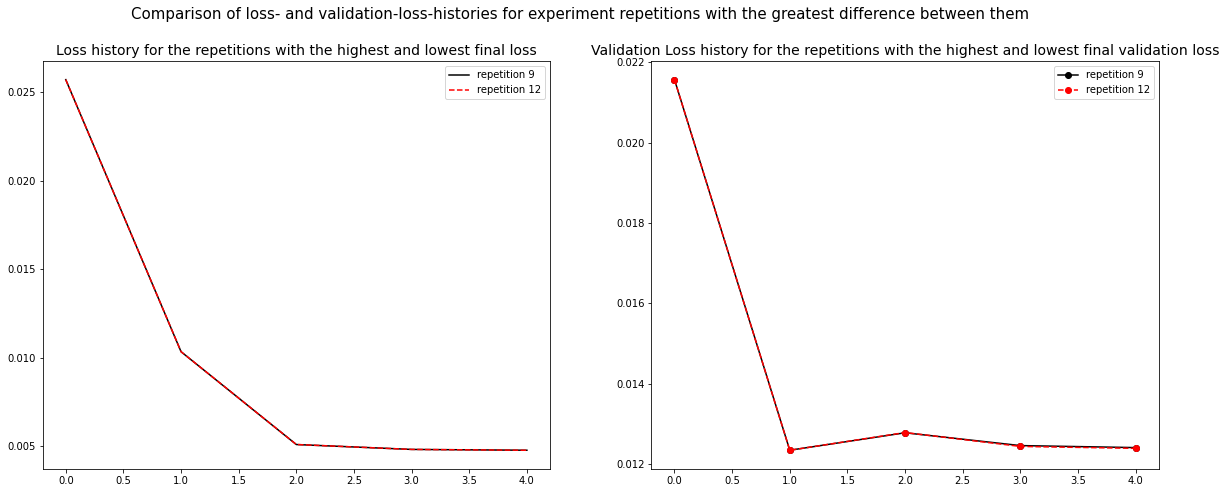

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e23_extreme_losses[e23_highest_final_loss_index],'k-' )
ax1.plot(e23_extreme_losses[e23_lowest_final_loss_index], 'r--')
ax1.set_title("Loss history for the repetitions with the highest and lowest final loss", fontsize = 14)
ax1.legend(['repetition {}'.format(e23_highest_final_loss_index), 'repetition {}'.format(e23_lowest_final_loss_index)])
ax2.plot(e23_extreme_val_losses[e23_highest_final_val_loss_index], 'ko-' )
ax2.plot(e23_extreme_val_losses[e23_lowest_final_val_loss_index], 'ro--')
ax2.set_title("Validation Loss history for the repetitions with the highest and lowest final validation loss", fontsize = 14)
ax2.legend(['repetition {}'.format(e23_highest_final_val_loss_index), 'repetition {}'.format(e23_lowest_final_val_loss_index)])

fig.suptitle('Comparison of loss- and validation-loss-histories for experiment repetitions with the greatest difference between them ', fontsize = 15)

fig.savefig("./graphs/e23_histories.png", format="png", dpi = 500, bbox_inches='tight')


#### GPU Decoder Outputs

The sum of absolute differences is 0.13279076999999956.
The mean difference is 0.0009485054999999968.
The average difference is 48.5595% of the lowest value.
The greatest difference is 0.0017321099999999534.
The greatest difference is 88.6768% of the lowest value.
The greatest difference is 23.0357% of the lower value.


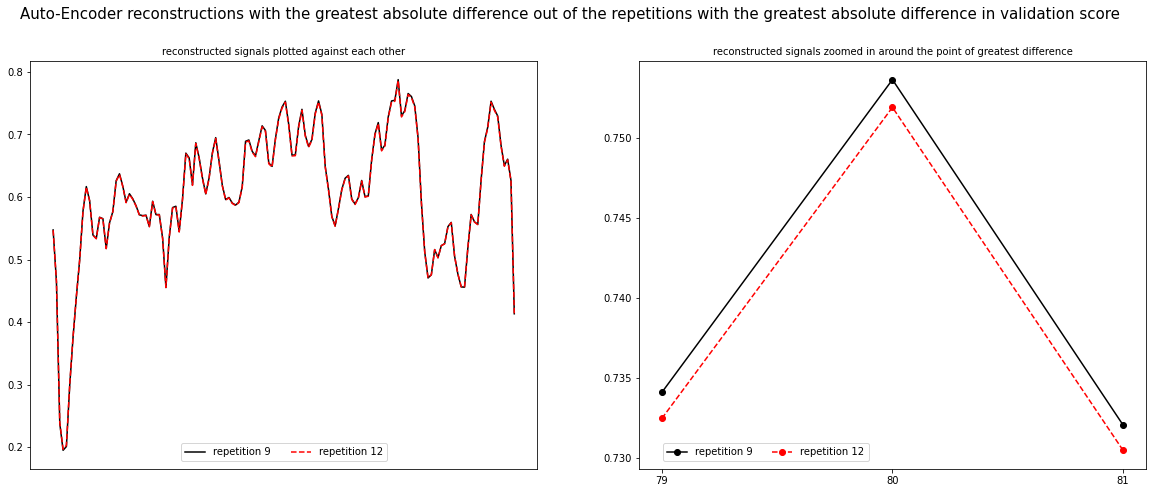

In [29]:
e23_lowest_val_loss_decoder = read_csv('results/e_23_GPU_025_2110837058/decoder_output_{}'.format(e23_highest_final_val_loss_index), index_col= 0)
e23_highest_val_loss_decoder = read_csv('results/e_23_GPU_025_2110837058/decoder_output_{}'.format(e23_lowest_final_val_loss_index), index_col= 0)

e23_sum_absolute_differences = abs(e23_highest_val_loss_decoder - e23_lowest_val_loss_decoder)
e23_greatest_difference_index = DataFrame(e23_sum_absolute_differences.T.sum()).idxmax()[0]

e23_decoded_1 = e23_lowest_val_loss_decoder.T[e23_greatest_difference_index]
e23_decoded_2 = e23_highest_val_loss_decoder.T[e23_greatest_difference_index]

e23_gddi = DataFrame(abs(e23_decoded_2 - e23_decoded_1)).idxmax().values[0]
e23_zoomrange = [str(int(e23_gddi) - 1), str(int(e23_gddi) + 1)]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e23_decoded_1, 'k-' )
ax1.plot(e23_decoded_2, 'r--')
ax1.set_title('reconstructed signals plotted against each other', fontsize = 10)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.legend(['repetition {}'.format(e23_highest_final_val_loss_index), 'repetition {}'.format(e23_lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)

ax2.plot(e23_decoded_1[e23_zoomrange[0]: e23_zoomrange[1]], 'ko-' )
ax2.plot(e23_decoded_2[e23_zoomrange[0]: e23_zoomrange[1]], 'ro--')
ax2.set_title('reconstructed signals zoomed in around the point of greatest difference', fontsize = 10)
ax2.legend(['repetition {}'.format(e23_highest_final_val_loss_index), 'repetition {}'.format(e23_lowest_final_val_loss_index)], bbox_to_anchor=(0.25, .075), loc='upper center', ncol = 2)

fig.suptitle('Auto-Encoder reconstructions with the greatest absolute difference out of the repetitions with the greatest absolute difference in validation score', fontsize = 15)
fig.savefig("./graphs/e23_reconstruction.png", format="png", dpi = 500, bbox_inches='tight')


e23_sum_abs_diff = DataFrame(abs(e23_decoded_2 - e23_decoded_1)).sum().values[0]
e23_mean_diff = DataFrame(abs(e23_decoded_2 - e23_decoded_1)).mean().values[0]
e23_greatest_difference = DataFrame(abs(e23_decoded_2 - e23_decoded_1)).max().values[0]
e23_greatest_diff_index = DataFrame(abs(e23_decoded_2 - e23_decoded_1)).idxmax().values[0]

e23_minimum_value = min(e23_decoded_1.min(), e23_decoded_2.min())
e23_value_of_greatest_diff = min(e23_decoded_1[e23_greatest_diff_index], e23_decoded_2[e23_greatest_diff_index])

e23_mean_percentage = (e23_mean_diff/e23_minimum_value)*100
e23_max_percentage = (e23_greatest_difference/e23_minimum_value)*100
e23_actual_value_percentage = (e23_greatest_difference/e23_value_of_greatest_diff)*100

print('The sum of absolute differences is {}.'.format(e23_sum_abs_diff))
print('The mean difference is {}.'.format(e23_mean_diff))
print('The average difference is {:.4%} of the lowest value.'.format(e23_mean_percentage))
print('The greatest difference is {}.'.format(e23_greatest_difference))
print('The greatest difference is {:.4%} of the lowest value.'.format(e23_max_percentage))
print('The greatest difference is {:.4%} of the lower value.'.format(e23_actual_value_percentage))


## 273 layer autoencoder


100 repetitions of the GPU experiment produced 2 distinct loss histories.
100 repetitions of the GPU experiment produced 1 distinct validation loss histories.
100 repetitions of the GPU experiment produced 2 distinct model performances.
 
0 repetitions have the same loss histories but different validation loss histories.
1 repetitions have the same validation loss histories but different loss histories.
After the 5 epoch, repetition 0 had the highest loss. 
After the 5 epoch, repetition 1 had the lowest loss. 
 
The difference between them was 1.8626451006586997e-09.
 
The standard deviation of losses in the last epoch was 9.313225503293499e-10.
After the 5 epoch, repetition 0 had the highest validation loss. 
After the 5 epoch, repetition 0 had the lowest validation loss. 
 
The difference between them was 0.0.
 
The standard deviation of losses in the last epoch was 0.0.
Were any final GPU losses identical to the final CPU loss? False
Were any final GPU validation losses identical to

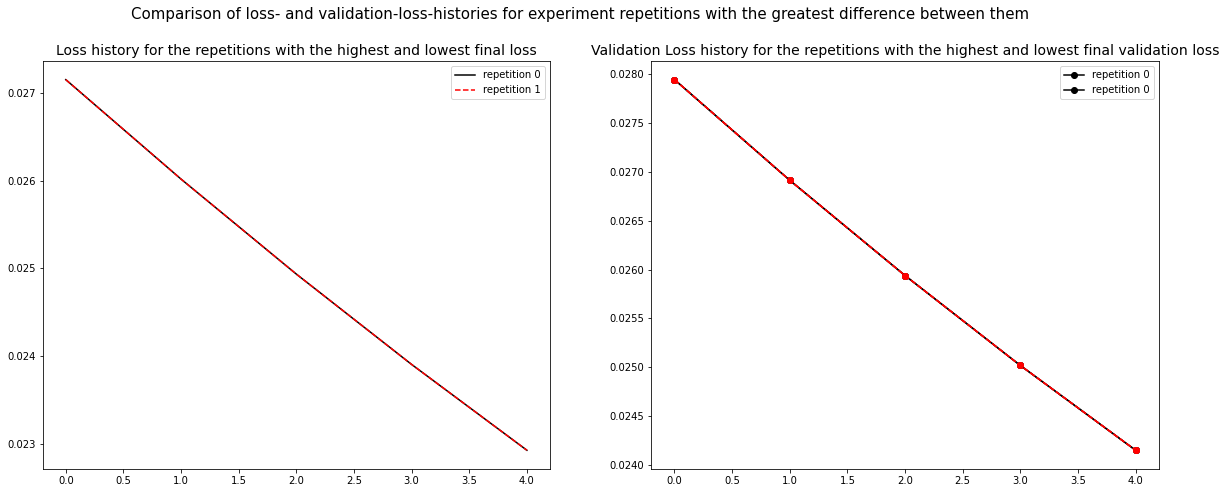

In [30]:
# Loading the loss histories and validation loss histories
e273_gpu_loss_histories = read_csv('results/e_273_GPU_025_2110837058/loss_histories.csv', index_col= 0).drop_duplicates()
e273_gpu_val_loss_hists = read_csv('results/e_273_GPU_025_2110837058/val_loss_hists.csv', index_col= 0).drop_duplicates()

e273_gpu_loss_histories = e273_gpu_loss_histories.T.drop_duplicates().T
e273_gpu_val_loss_hists = e273_gpu_val_loss_hists.T.drop_duplicates().T
e273_gpu_lhs_set = set(e273_gpu_loss_histories.columns)
e273_gpu_vlh_set = set(e273_gpu_val_loss_hists.columns)
e273_lh_diff_same_vl = list(e273_gpu_lhs_set - e273_gpu_vlh_set)
e273_vl_diff_same_lh = list(e273_gpu_vlh_set - e273_gpu_lhs_set)
e273_num_variations = len(list(e273_gpu_lhs_set.union(e273_gpu_vlh_set)))

# checking, how many results were produced
print('{} repetitions of the GPU experiment produced {} distinct loss histories.'.format(e273_gpu_repetitions, e273_gpu_loss_histories.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct validation loss histories.'.format(e273_gpu_repetitions, e273_gpu_val_loss_hists.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct model performances.'.format(e273_gpu_repetitions, e273_num_variations))
print(' ')
print('{} repetitions have the same loss histories but different validation loss histories.'.format(len(e273_vl_diff_same_lh)))
print('{} repetitions have the same validation loss histories but different loss histories.'.format(len(e273_lh_diff_same_vl)))


e273_highest_final_loss_index = e273_gpu_loss_histories.T[4].idxmax()
e273_lowest_final_loss_index = e273_gpu_loss_histories.T[4].idxmin()

e273_extreme_losses = e273_gpu_loss_histories[[e273_highest_final_loss_index, e273_lowest_final_loss_index]]

print('After the {} epoch, repetition {} had the highest loss. '.format(e273_gpu_epochs, e273_highest_final_loss_index) )
print('After the {} epoch, repetition {} had the lowest loss. '.format(e273_gpu_epochs, e273_lowest_final_loss_index))
print(' ')

print('The difference between them was {}.'.format(e273_extreme_losses.T[4][0] - e273_extreme_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e273_gpu_loss_histories.T[4])))

e273_highest_final_val_loss_index = e273_gpu_val_loss_hists.T[4].idxmax()
e273_lowest_final_val_loss_index = e273_gpu_val_loss_hists.T[4].idxmin()

e273_extreme_val_losses = e273_gpu_val_loss_hists[[e273_highest_final_val_loss_index, e273_lowest_final_val_loss_index]]

print('After the {} epoch, repetition {} had the highest validation loss. '.format(e273_gpu_epochs, e273_highest_final_val_loss_index) )
print('After the {} epoch, repetition {} had the lowest validation loss. '.format(e273_gpu_epochs, e273_lowest_final_val_loss_index))
print(' ')
print('The difference between them was {}.'.format(e273_extreme_val_losses.T[4][0] - e273_extreme_val_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e273_gpu_val_loss_hists.T[4])))

e273_final_gpu_losses = e273_gpu_loss_histories.T[4]
e273_final_gpu_val_losses = e273_gpu_val_loss_hists.T[4]

print('Were any final GPU losses identical to the final CPU loss? {}'.format(e273_final_gpu_losses.any == final_cpu_loss))
print('Were any final GPU validation losses identical to the final CPU validation loss? {}'.format(e273_final_gpu_val_losses.any == final_cpu_val_loss))
print(' ')
print('The smallest difference between the final CPU loss and a GPU loss is {}'.format((e273_gpu_loss_histories.T[4] - final_cpu_loss).min()))
print('The smallest difference between the final CPU validation loss and a GPU validation loss is {}'.format((e273_gpu_val_loss_hists.T[4] - final_cpu_val_loss).min()))
print(' ')
print('The mean difference betweeen the final CPU loss and GPU losses is {}'.format((e273_gpu_loss_histories.T[4] - final_cpu_loss).mean()))
print('The mean difference betweeen the final CPU validation loss and GPU validation losses is {}'.format((e273_gpu_val_loss_hists.T[4] - final_cpu_val_loss).mean()))


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e273_extreme_losses[e273_highest_final_loss_index],'k-' )
ax1.plot(e273_extreme_losses[e273_lowest_final_loss_index], 'r--')
ax1.set_title("Loss history for the repetitions with the highest and lowest final loss", fontsize = 14)
ax1.legend(['repetition {}'.format(e273_highest_final_loss_index), 'repetition {}'.format(e273_lowest_final_loss_index)])
ax2.plot(e273_extreme_val_losses[e273_highest_final_val_loss_index], 'ko-' )
ax2.plot(e273_extreme_val_losses[e273_lowest_final_val_loss_index], 'ro--')
ax2.set_title("Validation Loss history for the repetitions with the highest and lowest final validation loss", fontsize = 14)
ax2.legend(['repetition {}'.format(e273_highest_final_val_loss_index), 'repetition {}'.format(e273_lowest_final_val_loss_index)])

fig.suptitle('Comparison of loss- and validation-loss-histories for experiment repetitions with the greatest difference between them ', fontsize = 15)

fig.savefig("./graphs/e273_histories.png", format="png", dpi = 500, bbox_inches='tight')


The sum of absolute differences is 1.0000000005838672e-07.
The mean difference is 7.142857147027622e-10.
The average difference is 0.0000149490% of the lowest value.
The greatest difference is 1.0000000005838672e-07.
The greatest difference is 0.0021% of the lowest value.
The greatest difference is 0.0019% of the lower value.


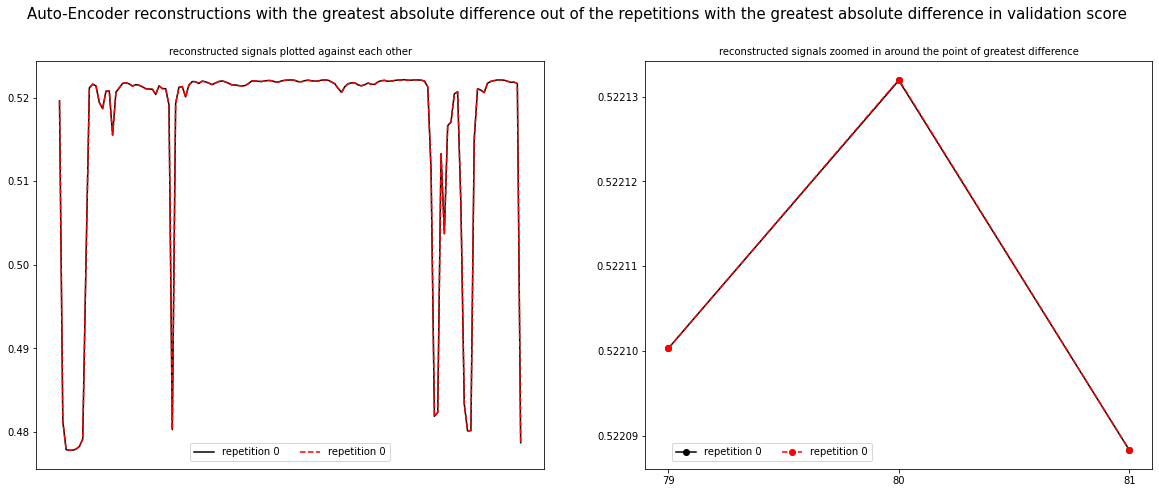

In [31]:


e273_lowest_loss_decoder = read_csv('results/e_273_GPU_025_2110837058/decoder_output_{}'.format(e273_highest_final_loss_index), index_col= 0)
e273_highest_loss_decoder = read_csv('results/e_273_GPU_025_2110837058/decoder_output_{}'.format(e273_lowest_final_loss_index), index_col= 0)

e273_sum_absolute_differences = abs(e273_highest_loss_decoder - e273_lowest_loss_decoder)
e273_greatest_difference_index = DataFrame(e273_sum_absolute_differences.T.sum()).idxmax()[0]

e273_decoded_1 = e273_lowest_loss_decoder.T[e273_greatest_difference_index]
e273_decoded_2 = e273_highest_loss_decoder.T[e273_greatest_difference_index]

e273_gddi = DataFrame(abs(e273_decoded_2 - e273_decoded_1)).idxmax().values[0]
e273_zoomrange = [str(int(e273_gddi) - 1), str(int(e273_gddi) + 1)]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e273_decoded_1, 'k-' )
ax1.plot(e273_decoded_2, 'r--')
ax1.set_title('reconstructed signals plotted against each other', fontsize = 10)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.legend(['repetition {}'.format(e273_highest_final_val_loss_index), 'repetition {}'.format(e273_lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)

ax2.plot(e273_decoded_1[e273_zoomrange[0]: e273_zoomrange[1]], 'ko-' )
ax2.plot(e273_decoded_2[e273_zoomrange[0]: e273_zoomrange[1]], 'ro--')
ax2.set_title('reconstructed signals zoomed in around the point of greatest difference', fontsize = 10)
ax2.legend(['repetition {}'.format(e273_highest_final_val_loss_index), 'repetition {}'.format(e273_lowest_final_val_loss_index)], bbox_to_anchor=(0.25, .075), loc='upper center', ncol = 2)

fig.suptitle('Auto-Encoder reconstructions with the greatest absolute difference out of the repetitions with the greatest absolute difference in validation score', fontsize = 15)
fig.savefig("./graphs/e273_reconstruction.png", format="png", dpi = 500, bbox_inches='tight')


e273_sum_abs_diff = DataFrame(abs(e273_decoded_2 - e273_decoded_1)).sum().values[0]
e273_mean_diff = DataFrame(abs(e273_decoded_2 - e273_decoded_1)).mean().values[0]
e273_greatest_difference = DataFrame(abs(e273_decoded_2 - e273_decoded_1)).max().values[0]
e273_greatest_diff_index = DataFrame(abs(e273_decoded_2 - e273_decoded_1)).idxmax().values[0]

e273_minimum_value = min(e273_decoded_1.min(), e273_decoded_2.min())
e273_value_of_greatest_diff = min(e273_decoded_1[e273_greatest_diff_index], e273_decoded_2[e273_greatest_diff_index])

e273_mean_percentage = (e273_mean_diff/e273_minimum_value)*100
e273_max_percentage = (e273_greatest_difference/e273_minimum_value)*100
e273_actual_value_percentage = (e273_greatest_difference/e273_value_of_greatest_diff)*100

print('The sum of absolute differences is {}.'.format(e273_sum_abs_diff))
print('The mean difference is {}.'.format(e273_mean_diff))
print('The average difference is {:.10%} of the lowest value.'.format(e273_mean_percentage))
print('The greatest difference is {}.'.format(e273_greatest_difference))
print('The greatest difference is {:.4%} of the lowest value.'.format(e273_max_percentage))
print('The greatest difference is {:.4%} of the lower value.'.format(e273_actual_value_percentage))



## 11 layer autoencoders

100 repetitions of the GPU experiment produced 56 distinct loss histories.
100 repetitions of the GPU experiment produced 101 distinct validation loss histories.
100 repetitions of the GPU experiment produced 101 distinct model performances.
 
45 repetitions have the same loss histories but different validation loss histories.
0 repetitions have the same validation loss histories but different loss histories.
After the 5 epoch, repetition 82 had the highest loss. 
After the 5 epoch, repetition 47 had the lowest loss. 
 
The difference between them was 2.3189932099945687e-07.
 
The standard deviation of losses in the last epoch was 9.800814486923858e-08.
After the 5 epoch, repetition 62 had the highest validation loss. 
After the 5 epoch, repetition 82 had the lowest validation loss. 
 
The difference between them was 1.7539598047700347e-05.
 
The standard deviation of losses in the last epoch was 5.771298428005459e-06.
Were any final GPU losses identical to the final CPU loss? False
We

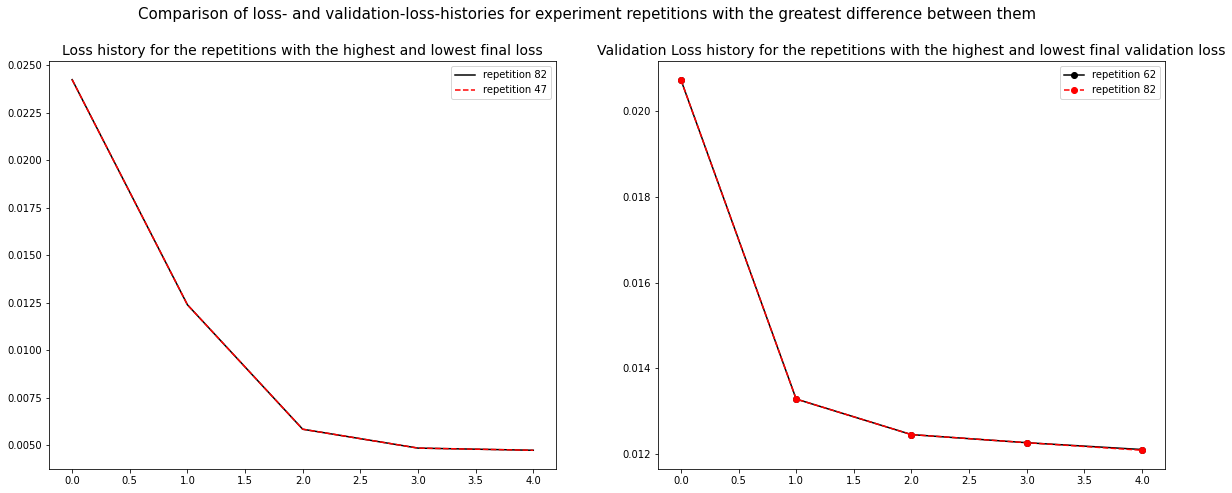

In [32]:
# Loading the loss histories and validation loss histories
e11_gpu_loss_histories = read_csv('results/e_11_GPU_025_2110837058_smallest_layer_4/loss_histories.csv', index_col= 0)
e11_gpu_val_loss_hists = read_csv('results/e_11_GPU_025_2110837058_smallest_layer_4/val_loss_hists.csv', index_col= 0)

e11_gpu_lhs_set = set(e11_gpu_loss_histories.columns)
e11_gpu_vlh_set = set(e11_gpu_val_loss_hists.columns)
e11_lh_diff_same_vl = list(e11_gpu_lhs_set - e11_gpu_vlh_set)
e11_vl_diff_same_lh = list(e11_gpu_vlh_set - e11_gpu_lhs_set)
e11_num_variations = len(list(e11_gpu_lhs_set.union(e11_gpu_vlh_set)))

# checking, how many results were produced
print('{} repetitions of the GPU experiment produced {} distinct loss histories.'.format(e11_gpu_repetitions, e11_gpu_loss_histories.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct validation loss histories.'.format(e11_gpu_repetitions, e11_gpu_val_loss_hists.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct model performances.'.format(e11_gpu_repetitions, e11_num_variations))
print(' ')
print('{} repetitions have the same loss histories but different validation loss histories.'.format(len(e11_vl_diff_same_lh)))
print('{} repetitions have the same validation loss histories but different loss histories.'.format(len(e11_lh_diff_same_vl)))

e11_highest_final_loss_index = e11_gpu_loss_histories.T[4].idxmax()
e11_lowest_final_loss_index = e11_gpu_loss_histories.T[4].idxmin()

e11_extreme_losses = e11_gpu_loss_histories[[e11_highest_final_loss_index, e11_lowest_final_loss_index]]

print('After the {} epoch, repetition {} had the highest loss. '.format(e11_gpu_epochs, e11_highest_final_loss_index) )
print('After the {} epoch, repetition {} had the lowest loss. '.format(e11_gpu_epochs, e11_lowest_final_loss_index))
print(' ')

print('The difference between them was {}.'.format(e11_extreme_losses.T[4][0] - e11_extreme_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e11_gpu_loss_histories.T[4])))

e11_highest_final_val_loss_index = e11_gpu_val_loss_hists.T[4].idxmax()
e11_lowest_final_val_loss_index = e11_gpu_val_loss_hists.T[4].idxmin()

e11_extreme_val_losses = e11_gpu_val_loss_hists[[e11_highest_final_val_loss_index, e11_lowest_final_val_loss_index]]

print('After the {} epoch, repetition {} had the highest validation loss. '.format(e11_gpu_epochs, e11_highest_final_val_loss_index) )
print('After the {} epoch, repetition {} had the lowest validation loss. '.format(e11_gpu_epochs, e11_lowest_final_val_loss_index))
print(' ')
print('The difference between them was {}.'.format(e11_extreme_val_losses.T[4][0] - e11_extreme_val_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e11_gpu_val_loss_hists.T[4])))

e11_final_gpu_losses = e11_gpu_loss_histories.T[4]
e11_final_gpu_val_losses = e11_gpu_val_loss_hists.T[4]

print('Were any final GPU losses identical to the final CPU loss? {}'.format(e11_final_gpu_losses.any == final_cpu_loss))
print('Were any final GPU validation losses identical to the final CPU validation loss? {}'.format(e11_final_gpu_val_losses.any == final_cpu_val_loss))
print(' ')
print('The smallest difference between the final CPU loss and a GPU loss is {}'.format((e11_gpu_loss_histories.T[4] - final_cpu_loss).min()))
print('The smallest difference between the final CPU validation loss and a GPU validation loss is {}'.format((e11_gpu_val_loss_hists.T[4] - final_cpu_val_loss).min()))
print(' ')
print('The mean difference betweeen the final CPU loss and GPU losses is {}'.format((e11_gpu_loss_histories.T[4] - final_cpu_loss).mean()))
print('The mean difference betweeen the final CPU validation loss and GPU validation losses is {}'.format((e11_gpu_val_loss_hists.T[4] - final_cpu_val_loss).mean()))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e11_extreme_losses[e11_highest_final_loss_index],'k-' )
ax1.plot(e11_extreme_losses[e11_lowest_final_loss_index], 'r--')
ax1.set_title("Loss history for the repetitions with the highest and lowest final loss", fontsize = 14)
ax1.legend(['repetition {}'.format(e11_highest_final_loss_index), 'repetition {}'.format(e11_lowest_final_loss_index)])
ax2.plot(e11_extreme_val_losses[e11_highest_final_val_loss_index], 'ko-' )
ax2.plot(e11_extreme_val_losses[e11_lowest_final_val_loss_index], 'ro--')
ax2.set_title("Validation Loss history for the repetitions with the highest and lowest final validation loss", fontsize = 14)
ax2.legend(['repetition {}'.format(e11_highest_final_val_loss_index), 'repetition {}'.format(e11_lowest_final_val_loss_index)])

fig.suptitle('Comparison of loss- and validation-loss-histories for experiment repetitions with the greatest difference between them ', fontsize = 15)

fig.savefig("./graphs/e11_histories.png", format="png", dpi = 500, bbox_inches='tight')



100 repetitions of the GPU experiment produced 101 distinct loss histories.
100 repetitions of the GPU experiment produced 101 distinct validation loss histories.
100 repetitions of the GPU experiment produced 101 distinct model performances.
 
0 repetitions have the same loss histories but different validation loss histories.
0 repetitions have the same validation loss histories but different loss histories.
After the 100 epoch, repetition 70 had the highest loss. 
After the 100 epoch, repetition 6 had the lowest loss. 
 
The difference between them was 1.2209638953000757e-06.
 
The standard deviation of losses in the last epoch was 1.3611452890531422e-07.
After the 100 epoch, repetition 54 had the highest validation loss. 
After the 100 epoch, repetition 1 had the lowest validation loss. 
 
The difference between them was 9.5227733253999e-06.
 
The standard deviation of losses in the last epoch was 2.280979385617867e-06.
Were any final GPU losses identical to the final CPU loss? Fals

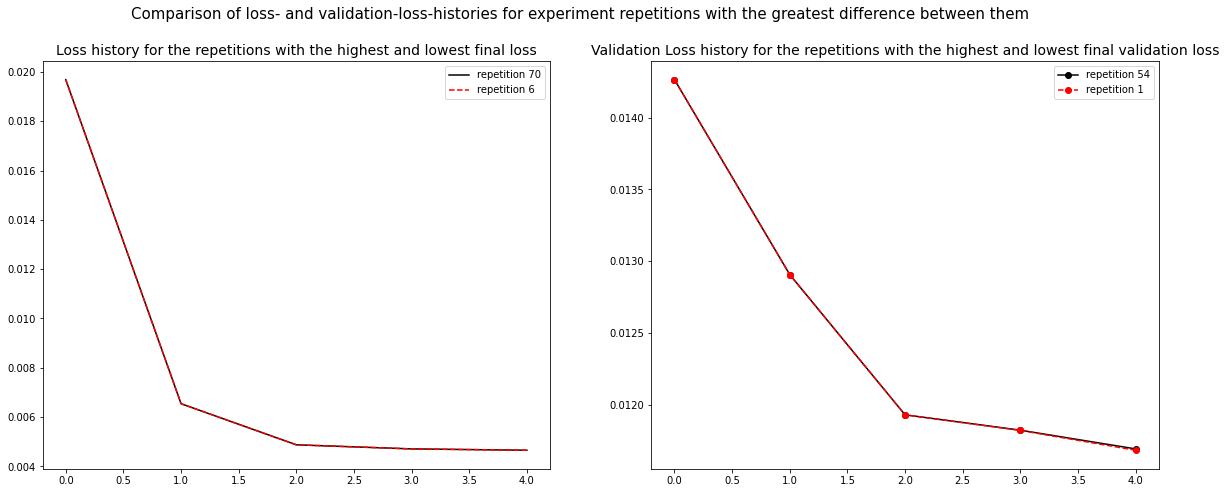

In [34]:
from results.e_11_GPU_025_2110837058_smallest_layer_8.settings import repetitions as e11_2_gpu_repetitions
from results.e_11_GPU_025_2110837058_smallest_layer_8.settings import repetitions as e11_2_gpu_epochs

# Loading the loss histories and validation loss histories
e11_2_gpu_loss_histories = read_csv('results/e_11_GPU_025_2110837058_smallest_layer_8/loss_histories.csv', index_col= 0)
e11_2_gpu_val_loss_hists = read_csv('results/e_11_GPU_025_2110837058_smallest_layer_8/val_loss_hists.csv', index_col= 0)

e11_2_gpu_lhs_set = set(e11_2_gpu_loss_histories.columns)
e11_2_gpu_vlh_set = set(e11_2_gpu_val_loss_hists.columns)
e11_2_lh_diff_same_vl = list(e11_2_gpu_lhs_set - e11_2_gpu_vlh_set)
e11_2_vl_diff_same_lh = list(e11_2_gpu_vlh_set - e11_2_gpu_lhs_set)
e11_2_num_variations = len(list(e11_2_gpu_lhs_set.union(e11_2_gpu_vlh_set)))

# checking, how many results were produced
print('{} repetitions of the GPU experiment produced {} distinct loss histories.'.format(e11_2_gpu_repetitions, e11_2_gpu_loss_histories.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct validation loss histories.'.format(e11_2_gpu_repetitions, e11_2_gpu_val_loss_hists.shape[1]))
print('{} repetitions of the GPU experiment produced {} distinct model performances.'.format(e11_2_gpu_repetitions, e11_2_num_variations))
print(' ')
print('{} repetitions have the same loss histories but different validation loss histories.'.format(len(e11_2_vl_diff_same_lh)))
print('{} repetitions have the same validation loss histories but different loss histories.'.format(len(e11_2_lh_diff_same_vl)))

e11_2_highest_final_loss_index = e11_2_gpu_loss_histories.T[4].idxmax()
e11_2_lowest_final_loss_index = e11_2_gpu_loss_histories.T[4].idxmin()

e11_2_extreme_losses = e11_2_gpu_loss_histories[[e11_2_highest_final_loss_index, e11_2_lowest_final_loss_index]]

print('After the {} epoch, repetition {} had the highest loss. '.format(e11_2_gpu_epochs, e11_2_highest_final_loss_index) )
print('After the {} epoch, repetition {} had the lowest loss. '.format(e11_2_gpu_epochs, e11_2_lowest_final_loss_index))
print(' ')

print('The difference between them was {}.'.format(e11_2_extreme_losses.T[4][0] - e11_2_extreme_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e11_2_gpu_loss_histories.T[4])))

e11_2_highest_final_val_loss_index = e11_2_gpu_val_loss_hists.T[4].idxmax()
e11_2_lowest_final_val_loss_index = e11_2_gpu_val_loss_hists.T[4].idxmin()

e11_2_extreme_val_losses = e11_2_gpu_val_loss_hists[[e11_2_highest_final_val_loss_index, e11_2_lowest_final_val_loss_index]]

print('After the {} epoch, repetition {} had the highest validation loss. '.format(e11_2_gpu_epochs, e11_2_highest_final_val_loss_index) )
print('After the {} epoch, repetition {} had the lowest validation loss. '.format(e11_2_gpu_epochs, e11_2_lowest_final_val_loss_index))
print(' ')
print('The difference between them was {}.'.format(e11_2_extreme_val_losses.T[4][0] - e11_2_extreme_val_losses.T[4][1]))
print(' ')
print('The standard deviation of losses in the last epoch was {}.'.format(std(e11_2_gpu_val_loss_hists.T[4])))

e11_2_final_gpu_losses = e11_2_gpu_loss_histories.T[4]
e11_2_final_gpu_val_losses = e11_2_gpu_val_loss_hists.T[4]

print('Were any final GPU losses identical to the final CPU loss? {}'.format(e11_2_final_gpu_losses.any == final_cpu_loss))
print('Were any final GPU validation losses identical to the final CPU validation loss? {}'.format(e11_2_final_gpu_val_losses.any == final_cpu_val_loss))
print(' ')
print('The smallest difference between the final CPU loss and a GPU loss is {}'.format((e11_2_gpu_loss_histories.T[4] - final_cpu_loss).min()))
print('The smallest difference between the final CPU validation loss and a GPU validation loss is {}'.format((e11_2_gpu_val_loss_hists.T[4] - final_cpu_val_loss).min()))
print(' ')
print('The mean difference betweeen the final CPU loss and GPU losses is {}'.format((e11_2_gpu_loss_histories.T[4] - final_cpu_loss).mean()))
print('The mean difference betweeen the final CPU validation loss and GPU validation losses is {}'.format((e11_2_gpu_val_loss_hists.T[4] - final_cpu_val_loss).mean()))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e11_2_extreme_losses[e11_2_highest_final_loss_index],'k-' )
ax1.plot(e11_2_extreme_losses[e11_2_lowest_final_loss_index], 'r--')
ax1.set_title("Loss history for the repetitions with the highest and lowest final loss", fontsize = 14)
ax1.legend(['repetition {}'.format(e11_2_highest_final_loss_index), 'repetition {}'.format(e11_2_lowest_final_loss_index)])
ax2.plot(e11_2_extreme_val_losses[e11_2_highest_final_val_loss_index], 'ko-' )
ax2.plot(e11_2_extreme_val_losses[e11_2_lowest_final_val_loss_index], 'ro--')
ax2.set_title("Validation Loss history for the repetitions with the highest and lowest final validation loss", fontsize = 14)
ax2.legend(['repetition {}'.format(e11_2_highest_final_val_loss_index), 'repetition {}'.format(e11_2_lowest_final_val_loss_index)])

fig.suptitle('Comparison of loss- and validation-loss-histories for experiment repetitions with the greatest difference between them ', fontsize = 15)

fig.savefig("./graphs/e11_2_histories.png", format="png", dpi = 500, bbox_inches='tight')



The sum of absolute differences is 0.10698431.
The mean difference is 0.0007641736428571429.
The average difference is 31.7192% of the lowest value.
The greatest difference is 0.001643050000000007.
The greatest difference is 68.1994% of the lowest value.
The greatest difference is 68.1994% of the lower value.


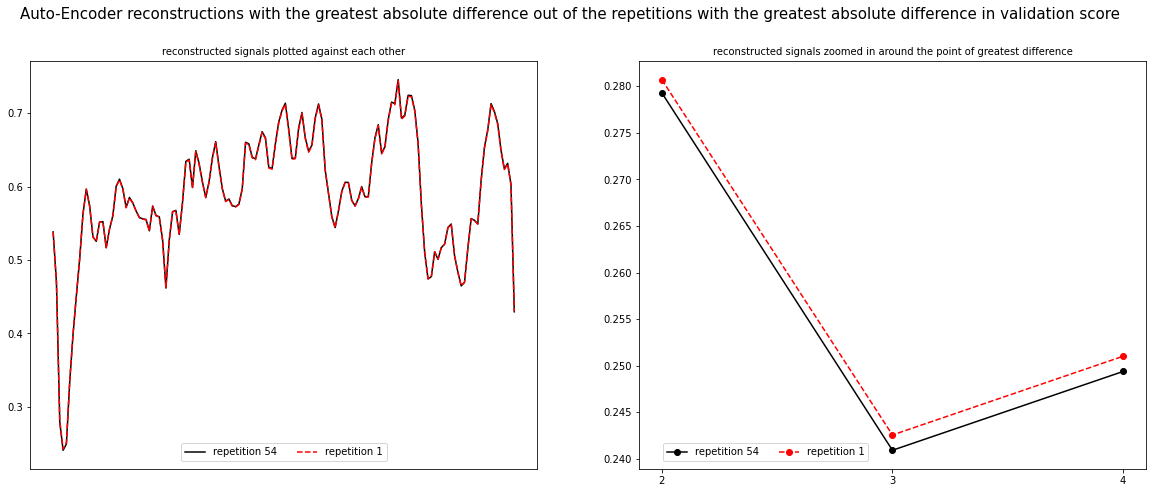

In [35]:
e11_2_lowest_val_loss_decoder = read_csv('results/e_11_GPU_025_2110837058_smallest_layer_8/decoder_output_{}'.format(e11_2_highest_final_val_loss_index), index_col= 0)
e11_2_highest_val_loss_decoder = read_csv('results/e_11_GPU_025_2110837058_smallest_layer_8/decoder_output_{}'.format(e11_2_lowest_final_val_loss_index), index_col= 0)

e11_2_sum_absolute_differences = abs(e11_2_highest_val_loss_decoder - e11_2_lowest_val_loss_decoder)
e11_2_greatest_difference_index = DataFrame(e11_2_sum_absolute_differences.T.sum()).idxmax()[0]

e11_2_decoded_1 = e11_2_lowest_val_loss_decoder.T[e11_2_greatest_difference_index]
e11_2_decoded_2 = e11_2_highest_val_loss_decoder.T[e11_2_greatest_difference_index]

e11_2_gddi = DataFrame(abs(e11_2_decoded_2 - e11_2_decoded_1)).idxmax().values[0]
e11_2_zoomrange = [str(int(e11_2_gddi) - 1), str(int(e11_2_gddi) + 1)]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e11_2_decoded_1, 'k-' )
ax1.plot(e11_2_decoded_2, 'r--')
ax1.set_title('reconstructed signals plotted against each other', fontsize = 10)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.legend(['repetition {}'.format(e11_2_highest_final_val_loss_index), 'repetition {}'.format(e11_2_lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)

ax2.plot(e11_2_decoded_1[e11_2_zoomrange[0]: e11_2_zoomrange[1]], 'ko-' )
ax2.plot(e11_2_decoded_2[e11_2_zoomrange[0]: e11_2_zoomrange[1]], 'ro--')
ax2.set_title('reconstructed signals zoomed in around the point of greatest difference', fontsize = 10)
ax2.legend(['repetition {}'.format(e11_2_highest_final_val_loss_index), 'repetition {}'.format(e11_2_lowest_final_val_loss_index)], bbox_to_anchor=(0.25, .075), loc='upper center', ncol = 2)

fig.suptitle('Auto-Encoder reconstructions with the greatest absolute difference out of the repetitions with the greatest absolute difference in validation score', fontsize = 15)
fig.savefig("./graphs/e11_2_reconstruction.png", format="png", dpi = 500, bbox_inches='tight')

e11_2_sum_abs_diff = DataFrame(abs(e11_2_decoded_2 - e11_2_decoded_1)).sum().values[0]
e11_2_mean_diff = DataFrame(abs(e11_2_decoded_2 - e11_2_decoded_1)).mean().values[0]
e11_2_greatest_difference = DataFrame(abs(e11_2_decoded_2 - e11_2_decoded_1)).max().values[0]
e11_2_greatest_diff_index = DataFrame(abs(e11_2_decoded_2 - e11_2_decoded_1)).idxmax().values[0]

e11_2_minimum_value = min(e11_2_decoded_1.min(), e11_2_decoded_2.min())
e11_2_value_of_greatest_diff = min(e11_2_decoded_1[e11_2_greatest_diff_index], e11_2_decoded_2[e11_2_greatest_diff_index])

e11_2_mean_percentage = (e11_2_mean_diff/e11_2_minimum_value)*100
e11_2_max_percentage = (e11_2_greatest_difference/e11_2_minimum_value)*100
e11_2_actual_value_percentage = (e11_2_greatest_difference/e11_2_value_of_greatest_diff)*100

print('The sum of absolute differences is {}.'.format(e11_2_sum_abs_diff))
print('The mean difference is {}.'.format(e11_2_mean_diff))
print('The average difference is {:.4%} of the lowest value.'.format(e11_2_mean_percentage))
print('The greatest difference is {}.'.format(e11_2_greatest_difference))
print('The greatest difference is {:.4%} of the lowest value.'.format(e11_2_max_percentage))
print('The greatest difference is {:.4%} of the lower value.'.format(e11_2_actual_value_percentage))


The sum of absolute differences is 0.07999154000000025.
The mean difference is 0.0005713681428571447.
The average difference is 27.3851% of the lowest value.
The greatest difference is 0.001091769999999992.
The greatest difference is 52.3274% of the lowest value.
The greatest difference is 52.3274% of the lower value.


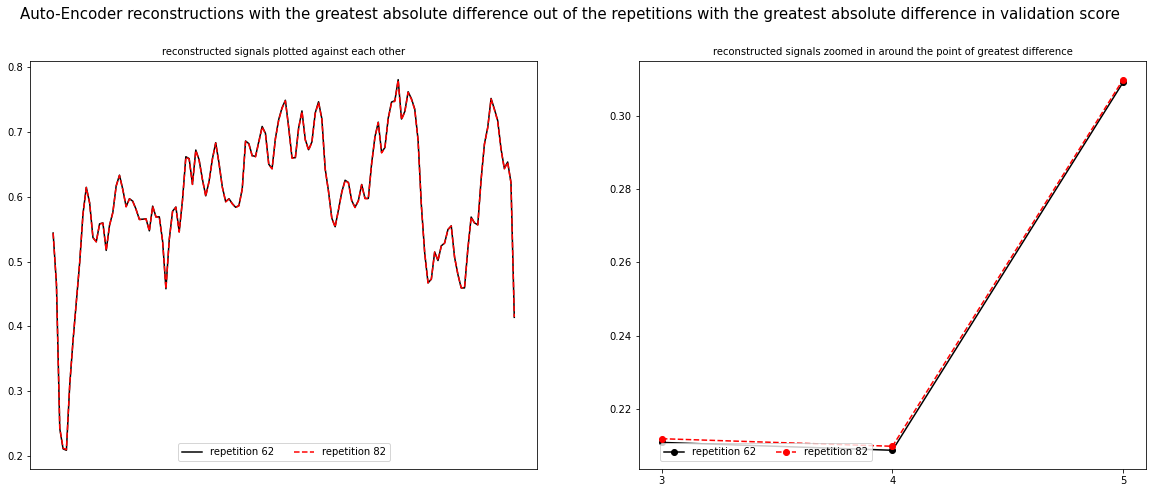

In [36]:
e11_lowest_val_loss_decoder = read_csv('results/e_11_GPU_025_2110837058_smallest_layer_4/decoder_output_{}'.format(e11_highest_final_val_loss_index), index_col= 0)
e11_highest_val_loss_decoder = read_csv('results/e_11_GPU_025_2110837058_smallest_layer_4/decoder_output_{}'.format(e11_lowest_final_val_loss_index), index_col= 0)

e11_sum_absolute_differences = abs(e11_highest_val_loss_decoder - e11_lowest_val_loss_decoder)
e11_greatest_difference_index = DataFrame(e11_sum_absolute_differences.T.sum()).idxmax()[0]

e11_decoded_1 = e11_lowest_val_loss_decoder.T[e11_greatest_difference_index]
e11_decoded_2 = e11_highest_val_loss_decoder.T[e11_greatest_difference_index]

e11_gddi = DataFrame(abs(e11_decoded_2 - e11_decoded_1)).idxmax().values[0]
e11_zoomrange = [str(int(e11_gddi) - 1), str(int(e11_gddi) + 1)]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7.5)
fig.set_figwidth(20)

ax1.plot(e11_decoded_1, 'k-' )
ax1.plot(e11_decoded_2, 'r--')
ax1.set_title('reconstructed signals plotted against each other', fontsize = 10)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.legend(['repetition {}'.format(e11_highest_final_val_loss_index), 'repetition {}'.format(e11_lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)

ax2.plot(e11_decoded_1[e11_zoomrange[0]: e11_zoomrange[1]], 'ko-' )
ax2.plot(e11_decoded_2[e11_zoomrange[0]: e11_zoomrange[1]], 'ro--')
ax2.set_title('reconstructed signals zoomed in around the point of greatest difference', fontsize = 10)
ax2.legend(['repetition {}'.format(e11_highest_final_val_loss_index), 'repetition {}'.format(e11_lowest_final_val_loss_index)], bbox_to_anchor=(0.25, .075), loc='upper center', ncol = 2)

fig.suptitle('Auto-Encoder reconstructions with the greatest absolute difference out of the repetitions with the greatest absolute difference in validation score', fontsize = 15)
fig.savefig("./graphs/e11_reconstruction.png", format="png", dpi = 500, bbox_inches='tight')

e11_sum_abs_diff = DataFrame(abs(e11_decoded_2 - e11_decoded_1)).sum().values[0]
e11_mean_diff = DataFrame(abs(e11_decoded_2 - e11_decoded_1)).mean().values[0]
e11_greatest_difference = DataFrame(abs(e11_decoded_2 - e11_decoded_1)).max().values[0]
e11_greatest_diff_index = DataFrame(abs(e11_decoded_2 - e11_decoded_1)).idxmax().values[0]

e11_minimum_value = min(e11_decoded_1.min(), e11_decoded_2.min())
e11_value_of_greatest_diff = min(e11_decoded_1[e11_greatest_diff_index], e11_decoded_2[e11_greatest_diff_index])

e11_mean_percentage = (e11_mean_diff/e11_minimum_value)*100
e11_max_percentage = (e11_greatest_difference/e11_minimum_value)*100
e11_actual_value_percentage = (e11_greatest_difference/e11_value_of_greatest_diff)*100

print('The sum of absolute differences is {}.'.format(e11_sum_abs_diff))
print('The mean difference is {}.'.format(e11_mean_diff))
print('The average difference is {:.4%} of the lowest value.'.format(e11_mean_percentage))
print('The greatest difference is {}.'.format(e11_greatest_difference))
print('The greatest difference is {:.4%} of the lowest value.'.format(e11_max_percentage))
print('The greatest difference is {:.4%} of the lower value.'.format(e11_actual_value_percentage))



## Graphics generation

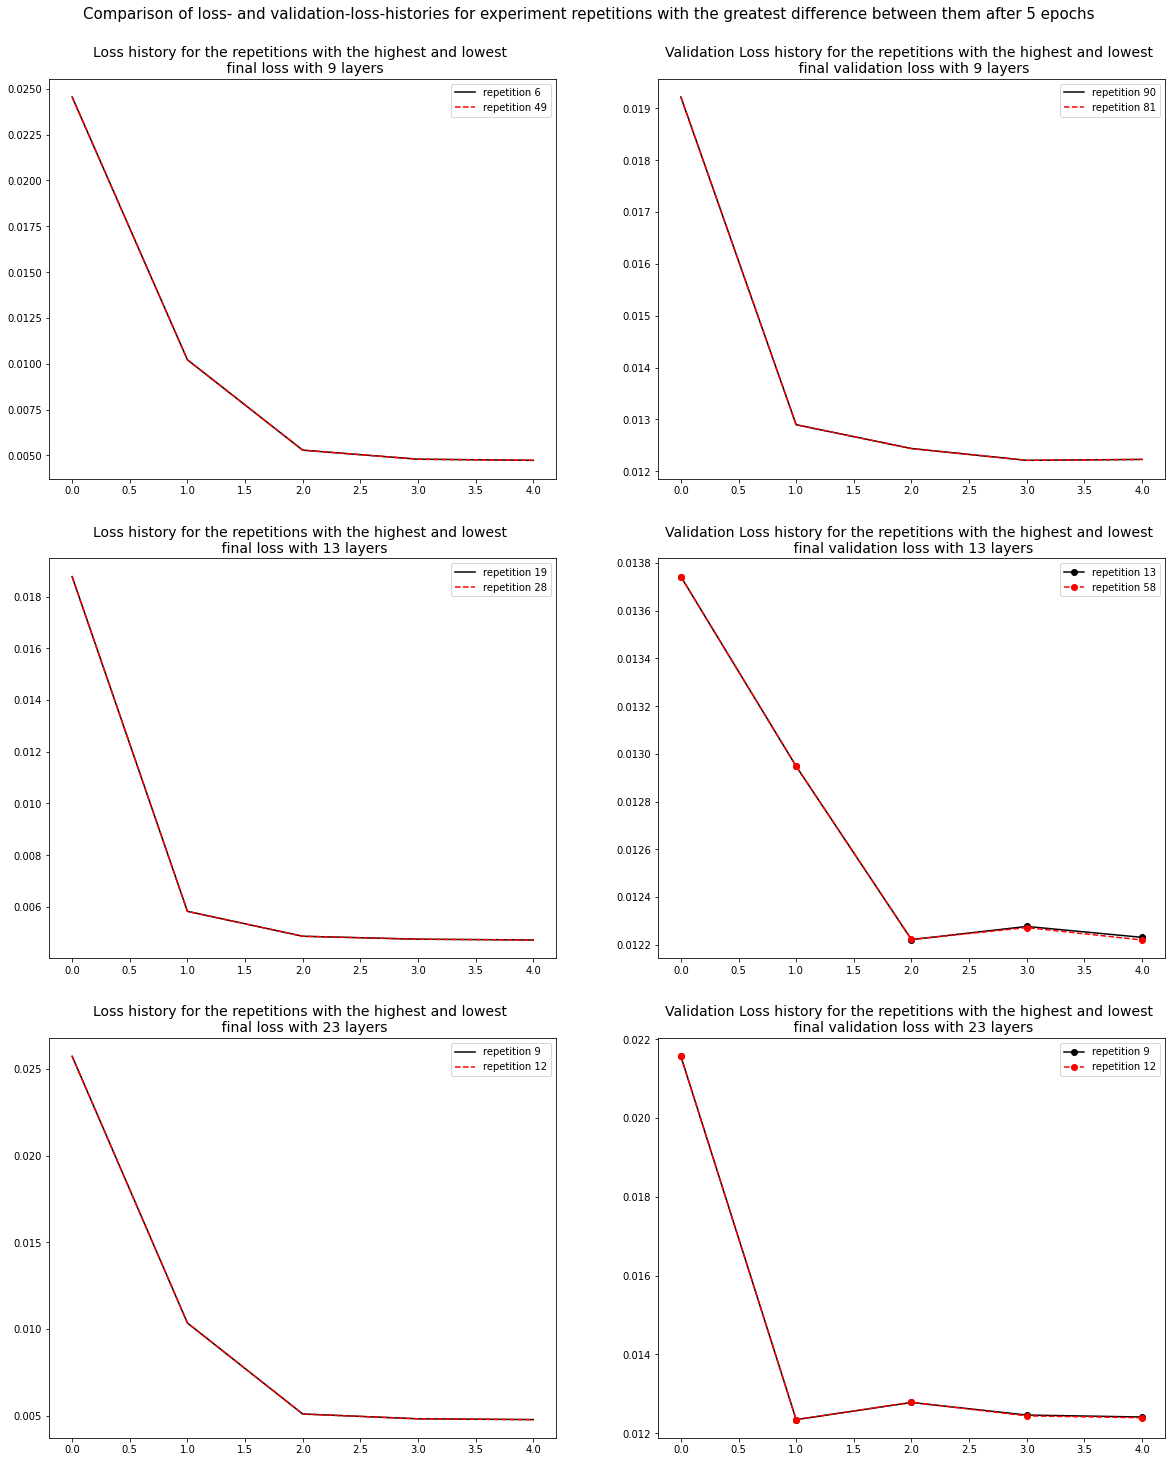

In [32]:
fig, ax = plt.subplots(3, 2)
fig.set_figheight(25)
fig.set_figwidth(20)

ax[0][0].plot(extreme_losses[highest_final_loss_index],'k-' )
ax[0][0].plot(extreme_losses[lowest_final_loss_index], 'r--')
ax[0][0].set_title("Loss history for the repetitions with the highest and lowest \n final loss with 9 layers", fontsize = 14)
ax[0][0].legend(['repetition {}'.format(highest_final_loss_index), 'repetition {}'.format(lowest_final_loss_index)])
ax[0][1].plot(extreme_val_losses[highest_final_val_loss_index], 'k-' )
ax[0][1].plot(extreme_val_losses[lowest_final_val_loss_index], 'r--')
ax[0][1].set_title("Validation Loss history for the repetitions with the highest and lowest \n final validation loss with 9 layers", fontsize = 14)
ax[0][1].legend(['repetition {}'.format(highest_final_val_loss_index), 'repetition {}'.format(lowest_final_val_loss_index)])

ax[1][0].plot(e13_extreme_losses[e13_highest_final_loss_index],'k-' )
ax[1][0].plot(e13_extreme_losses[e13_lowest_final_loss_index], 'r--')
ax[1][0].set_title("Loss history for the repetitions with the highest and lowest \n final loss with 13 layers", fontsize = 14)
ax[1][0].legend(['repetition {}'.format(e13_highest_final_loss_index), 'repetition {}'.format(e13_lowest_final_loss_index)])
ax[1][1].plot(e13_extreme_val_losses[e13_highest_final_val_loss_index], 'ko-' )
ax[1][1].plot(e13_extreme_val_losses[e13_lowest_final_val_loss_index], 'ro--')
ax[1][1].set_title("Validation Loss history for the repetitions with the highest and lowest \n final validation loss with 13 layers", fontsize = 14)
ax[1][1].legend(['repetition {}'.format(e13_highest_final_val_loss_index), 'repetition {}'.format(e13_lowest_final_val_loss_index)])

ax[2][0].plot(e23_extreme_losses[e23_highest_final_loss_index],'k-' )
ax[2][0].plot(e23_extreme_losses[e23_lowest_final_loss_index], 'r--')
ax[2][0].set_title("Loss history for the repetitions with the highest and lowest \n final loss with 23 layers", fontsize = 14)
ax[2][0].legend(['repetition {}'.format(e23_highest_final_loss_index), 'repetition {}'.format(e23_lowest_final_loss_index)])
ax[2][1].plot(e23_extreme_val_losses[e23_highest_final_val_loss_index], 'ko-' )
ax[2][1].plot(e23_extreme_val_losses[e23_lowest_final_val_loss_index], 'ro--')
ax[2][1].set_title("Validation Loss history for the repetitions with the highest and lowest \n final validation loss with 23 layers", fontsize = 14)
ax[2][1].legend(['repetition {}'.format(e23_highest_final_val_loss_index), 'repetition {}'.format(e23_lowest_final_val_loss_index)])

fig.suptitle('Comparison of loss- and validation-loss-histories for experiment repetitions with the greatest difference between them after 5 epochs', fontsize = 15, y=0.92)
fig.savefig("./graphs/full_histories.png", format="png", dpi = 500, bbox_inches='tight')

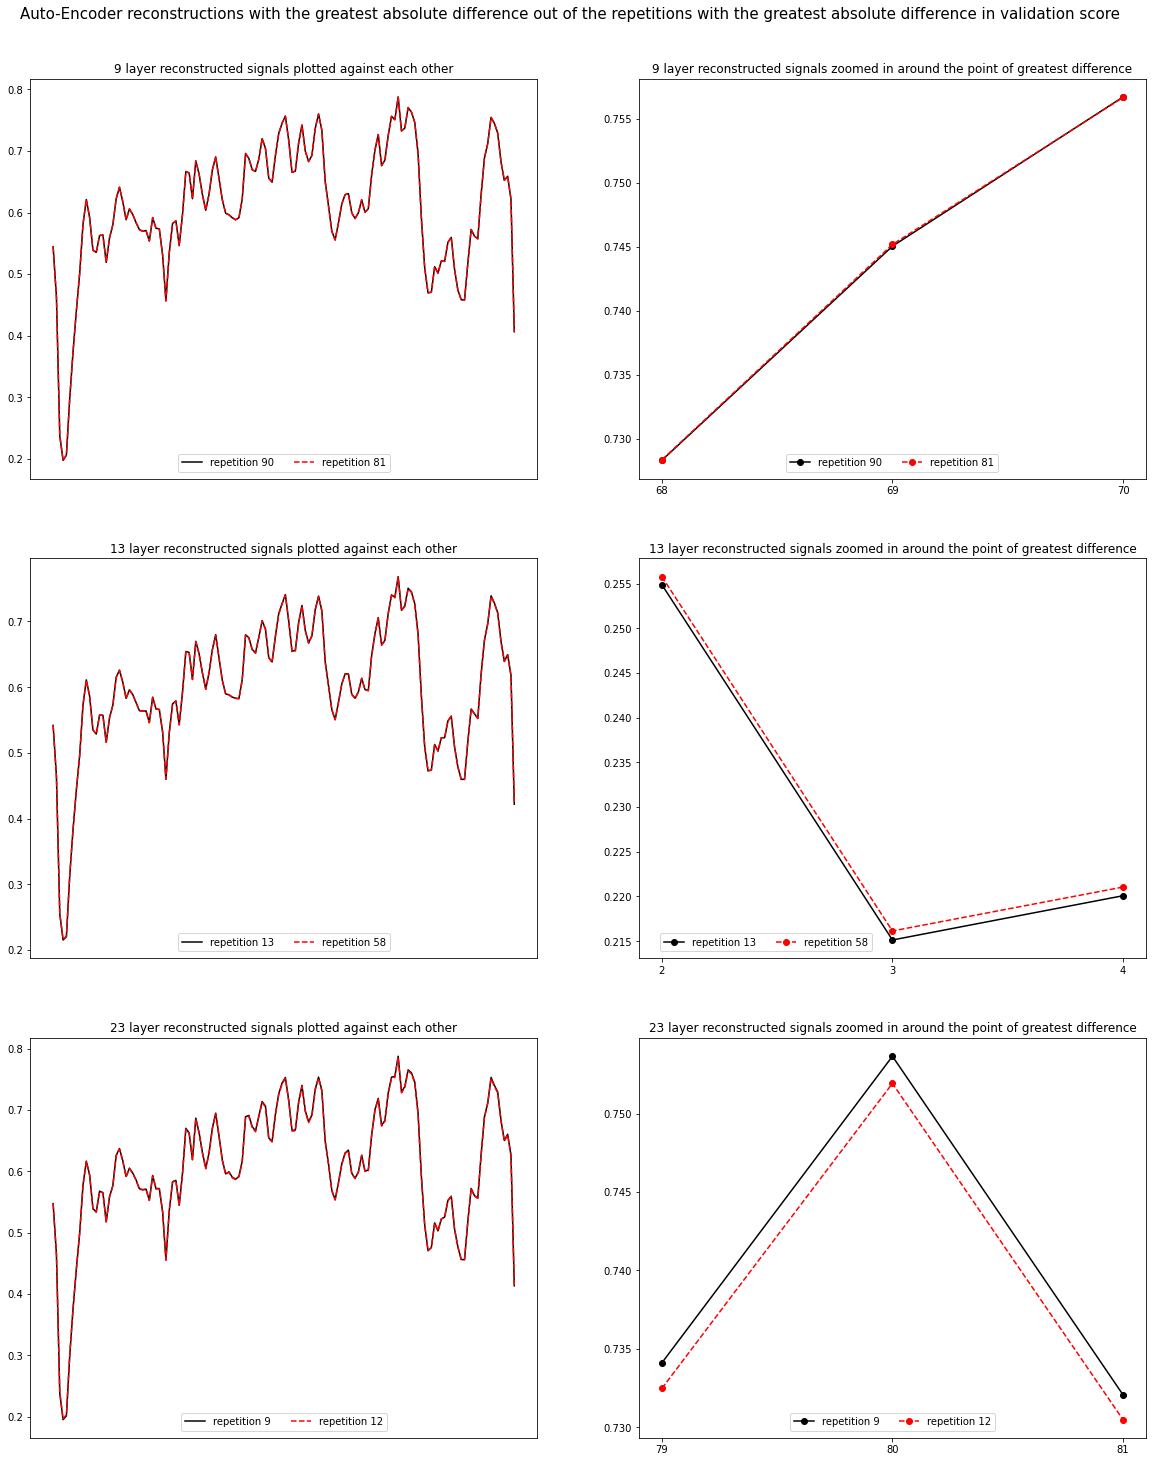

In [33]:
fig, ax = plt.subplots(3, 2)
fig.set_figheight(25)
fig.set_figwidth(20)

ax[0][0].plot(decoded_1, 'k-' )
ax[0][0].plot(decoded_2, 'r--')
ax[0][0].set_title('9 layer reconstructed signals plotted against each other', fontsize = 12)
ax[0][0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0][0].legend(['repetition {}'.format(highest_final_val_loss_index), 'repetition {}'.format(lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)


ax[0][1].plot(decoded_1[zoomrange[0]: zoomrange[1]], 'ko-' )
ax[0][1].plot(decoded_2[zoomrange[0]: zoomrange[1]], 'ro--')
ax[0][1].set_title('9 layer reconstructed signals zoomed in around the point of greatest difference', fontsize = 12)
ax[0][1].legend(['repetition {}'.format(highest_final_val_loss_index), 'repetition {}'.format(lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)

ax[1][0].plot(e13_decoded_1, 'k-' )
ax[1][0].plot(e13_decoded_2, 'r--')
ax[1][0].set_title('13 layer reconstructed signals plotted against each other', fontsize = 12)
ax[1][0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1][0].legend(['repetition {}'.format(e13_highest_final_val_loss_index), 'repetition {}'.format(e13_lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)


ax[1][1].plot(e13_decoded_1[e13_zoomrange[0]: e13_zoomrange[1]], 'ko-' )
ax[1][1].plot(e13_decoded_2[e13_zoomrange[0]: e13_zoomrange[1]], 'ro--')
ax[1][1].set_title('13 layer reconstructed signals zoomed in around the point of greatest difference', fontsize = 12)
ax[1][1].legend(['repetition {}'.format(e13_highest_final_val_loss_index), 'repetition {}'.format(e13_lowest_final_val_loss_index)], bbox_to_anchor=(0.25, .075), loc='upper center', ncol = 2)


ax[2][0].plot(e23_decoded_1, 'k-' )
ax[2][0].plot(e23_decoded_2, 'r--')
ax[2][0].set_title('23 layer reconstructed signals plotted against each other', fontsize = 12)
ax[2][0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[2][0].legend(['repetition {}'.format(e23_highest_final_val_loss_index), 'repetition {}'.format(e23_lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)

ax[2][1].plot(e23_decoded_1[e23_zoomrange[0]: e23_zoomrange[1]], 'ko-' )
ax[2][1].plot(e23_decoded_2[e23_zoomrange[0]: e23_zoomrange[1]], 'ro--')
ax[2][1].set_title('23 layer reconstructed signals zoomed in around the point of greatest difference', fontsize = 12)
ax[2][1].legend(['repetition {}'.format(e23_highest_final_val_loss_index), 'repetition {}'.format(e23_lowest_final_val_loss_index)], bbox_to_anchor=(0.5, .075), loc='upper center', ncol = 2)


fig.suptitle('Auto-Encoder reconstructions with the greatest absolute difference out of the repetitions with the greatest absolute difference in validation score', fontsize = 15,  y=0.92)
fig.savefig("./graphs/all_reconstructions.png", format="png", dpi = 500, bbox_inches='tight')

In [50]:
normal_test_data = read_csv('results/025_2110837058/normal_test_data.csv', index_col= 0)

model_1 = load_model('results/e_23_GPU_025_2110837058/model_5_125_{}'.format(e23_highest_final_val_loss_index))
model_2 = load_model('results/e_23_GPU_025_2110837058/model_5_125_{}'.format(e23_lowest_final_val_loss_index))

reconstructions_1 = model_1.predict(normal_test_data)
reconstructions_2 = model_2.predict(normal_test_data)

train_loss_1 = losses.mae(reconstructions_1, normal_test_data)
train_loss_2 = losses.mae(reconstructions_2, normal_test_data)


threshold_1 = mean(train_loss_1) + 2*std(train_loss_1)
threshold_2 = mean(train_loss_2) + 2*std(train_loss_2)

print('The difference in mean absolute errors between the models is {}.'.format(abs(mean(train_loss_1) - mean(train_loss_2))))
print('The difference between thresholds for classification as an anomaly is {}.'.format(abs(threshold_1 - threshold_2)))

The difference in mean absolute errors between the models is 2.4996072565459937e-05.
The difference between thresholds for classification as an anomaly is 8.726012180786114e-05.


In [55]:
from tensorflow.math import less
(less(train_loss_1, threshold_1) == less(train_loss_2, threshold_2))

<tf.Tensor: shape=(730,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

## Bottleneck layer size variation

In [45]:
from pandas import read_csv

mean_scores = read_csv('./results/bottleneck_variation_3_layers/mean_scores.csv', index_col=0)
score_stds = read_csv('./results/bottleneck_variation_3_layers/score_stds.csv', index_col=0)
distinct_counts = read_csv('./results/bottleneck_variation_3_layers/distinct_counts.csv', index_col=0)

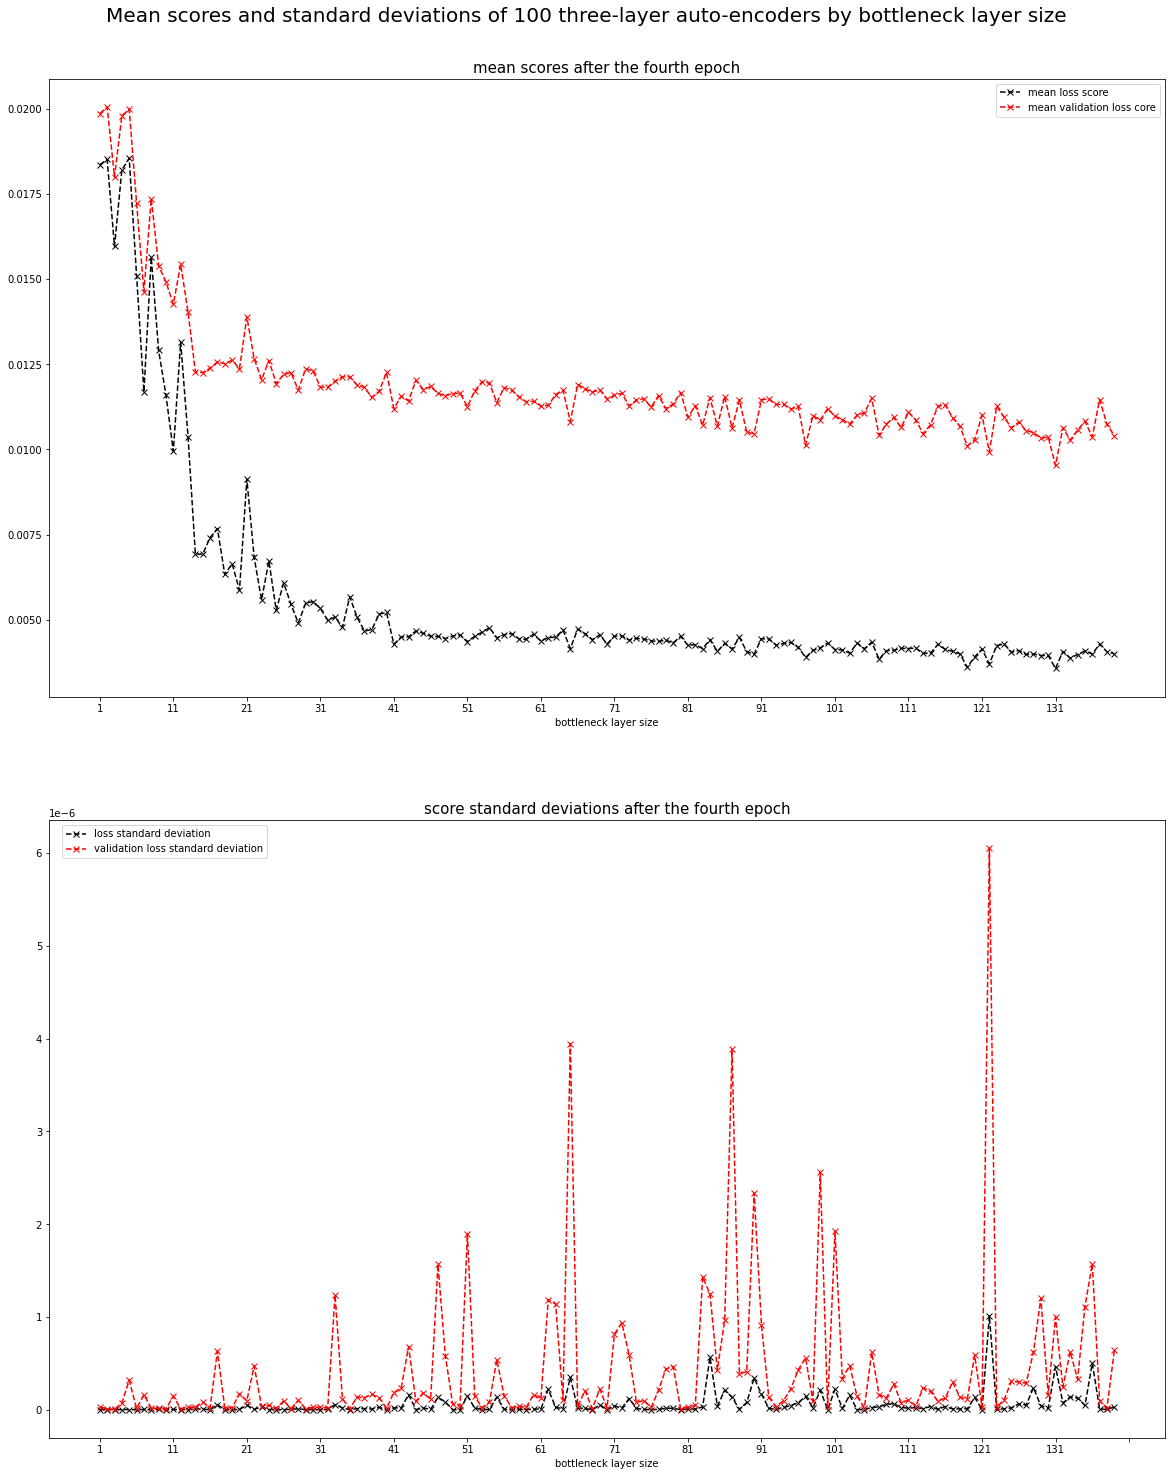

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
fig.set_figheight(25)
fig.set_figwidth(20)

ax[0].plot(mean_scores.T[0].T, 'kx--' )
ax[0].plot(mean_scores.T[1].T, 'rx--')
ax[0].set_title('mean scores after the fourth epoch', fontsize = 15)
#ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0].set_xticks(list(range(0,139,10)))
ax[0].legend(['mean loss score', 'mean validation loss core'], bbox_to_anchor=(1, 1), loc='upper right', ncol = 1)
ax[0].set_xlabel('bottleneck layer size')


ax[1].plot(score_stds.T[0].T, 'kx--' )
ax[1].plot(score_stds.T[1].T, 'rx--')
ax[1].set_title('score standard deviations after the fourth epoch', fontsize = 15)
#ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].set_xticks(list(range(0,141,10)))
ax[1].legend(['loss standard deviation', 'validation loss standard deviation'], bbox_to_anchor=(0.2, 1), loc='upper right', ncol = 1)
ax[1].set_xlabel('bottleneck layer size')

fig.suptitle('Mean scores and standard deviations of 100 three-layer auto-encoders by bottleneck layer size ', fontsize = 20,  y=0.92)
fig.savefig("./graphs/three_layer.png", format="png", dpi = 500, bbox_inches='tight')

In [47]:
mean_scores.T[0].corr(score_stds.T[0])

-0.19298894727477175

In [48]:
y = mean_scores.T[0]
lower_error = score_stds.T[0]*(-1)
upper_error = score_stds.T[0]
error = [lower_error, upper_error]
x = list(range(1,140))

y1 = mean_scores.T[1]
lower_error1 = (score_stds.T[1]) * -1
upper_error1 = score_stds.T[1]
error1 = [lower_error1, upper_error1]


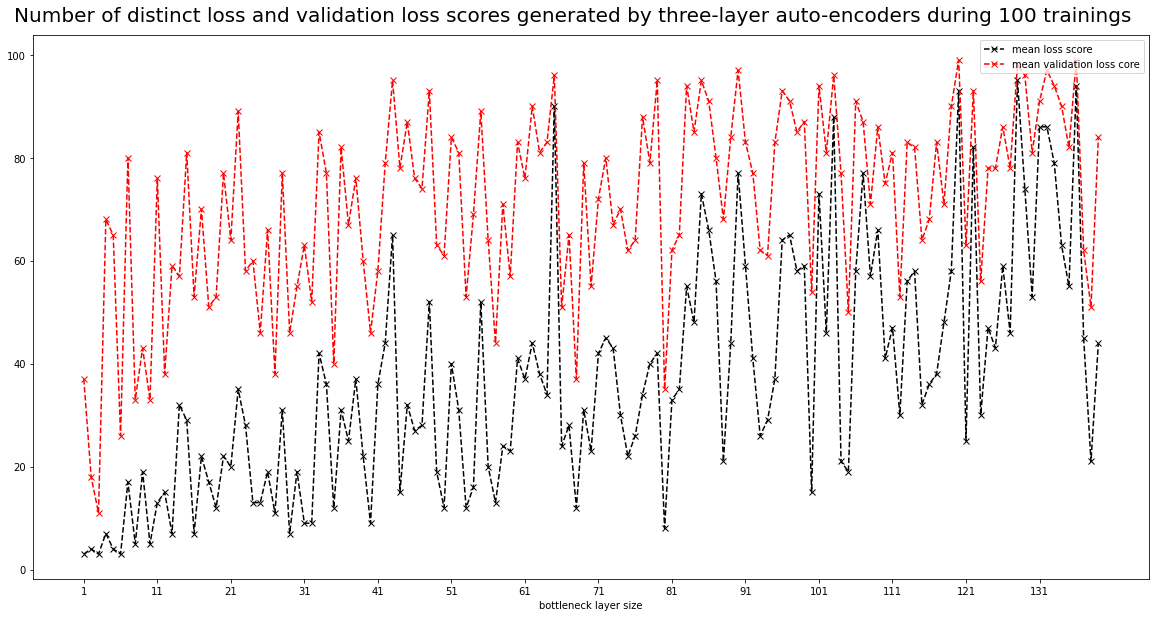

In [49]:
fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(20)

ax.plot(distinct_counts.T[0], 'kx--' )
ax.plot(distinct_counts.T[1], 'rx--')
ax.set_title('', fontsize = 15)
#ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.set_xticks(list(range(0,139,10)))
ax.legend(['mean loss score', 'mean validation loss core'], bbox_to_anchor=(1, 1), loc='upper right', ncol = 1)
ax.set_xlabel('bottleneck layer size')


fig.suptitle('Number of distinct loss and validation loss scores generated by three-layer auto-encoders during 100 trainings', fontsize = 20,  y=0.92)
fig.savefig("./graphs/three_layer_model_counts.png", format="png", dpi = 500, bbox_inches='tight')